# Inteligencia Artificial Teoria 

<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLparadigmas/Slide2.PNG" width=800, align="center">

 
 <img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/MLparadigmas/Slide1.PNG" width=800, align="center">

<img src="https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/ClassificationRegressionBreastCancer.png?raw=true" width=900, align="center">
<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/SUPERVISIONADO_E_REFORCO.png" width=800, align="center">




<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide4.PNG" width=800, align="center">





<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">

## Cuidado
$R^2 \approx 1 \Rightarrow $ então $x$ é **causa** e $y$ **efeito**.
$R^2 \approx  0 \Rightarrow $ não há relação entre os dados.

+ variaveis R ajustado

# Importando dados

In [123]:
# !pip install statsmodels

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
Estimador_preco_imovel = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
Estimador_preco_imovel.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


# Simulando dados

In [127]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_samples=120, class_sep=0.85, weights=[0.7,0.3],
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2
)

df2 = pd.DataFrame()
df2['income'] = ( X[:,0] + 3 ) * 10000
df2['balance'] = X[:,1] * 1000
df2['default'] = y
df2['default'] = df2['default'].astype('bool')

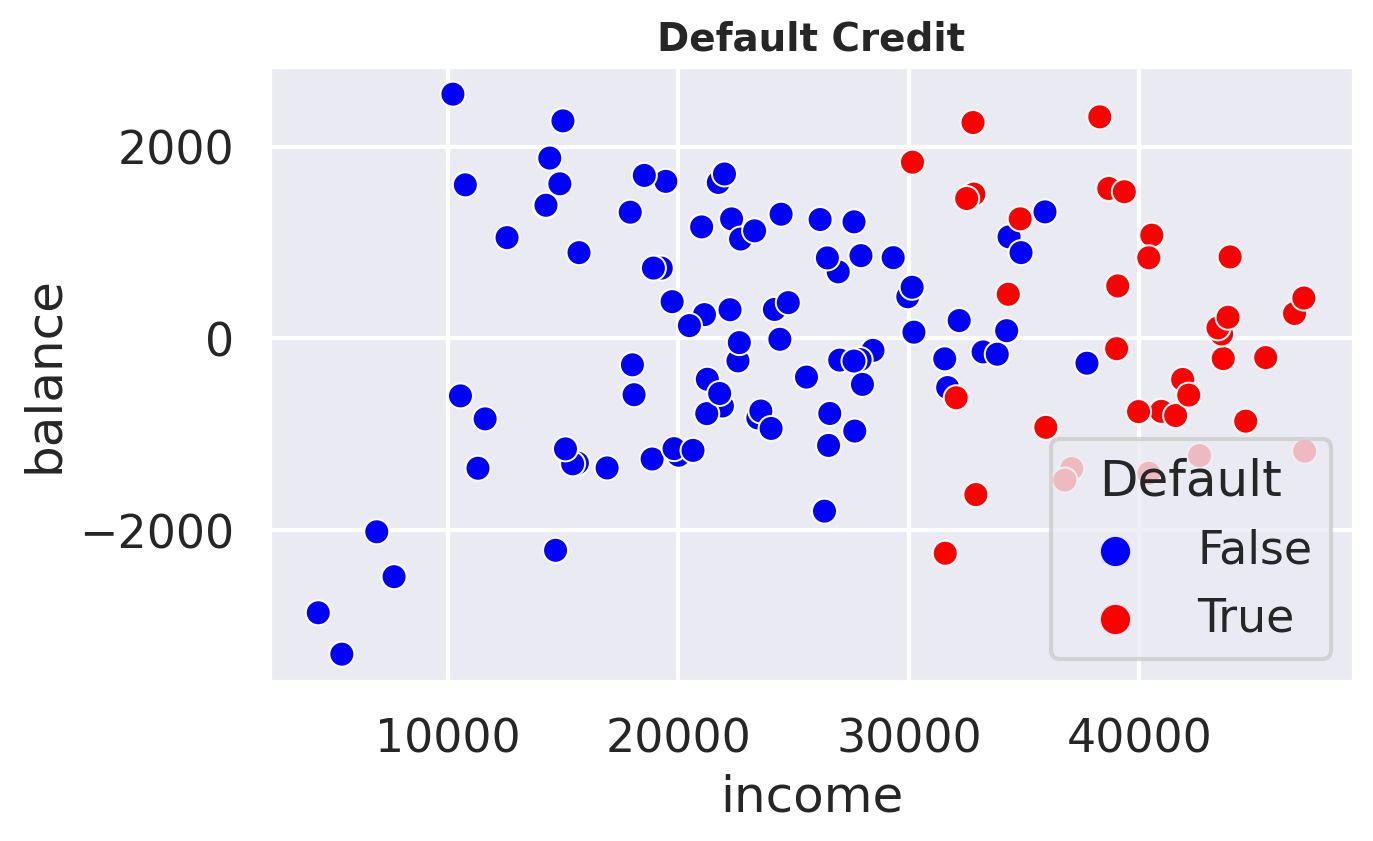

In [128]:
sns.scatterplot(x='income',y='balance',hue='default',data=df2,palette=['blue','red'])
plt.title('Default Credit', fontsize=14, weight='bold')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend(title='Default',loc='lower right')
plt.show()

plt.show()

# Exploração inicial dos dados 

In [129]:
df = Estimador_preco_imovel.copy()

In [130]:
df.describe()

,areaM2,suites,dormitorios,banheiros,vagas,preco
count,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
mean,140.343758,1.700882,2.946271,3.095429,2.225341,1.553746e+06
std,60.051791,0.994945,0.759292,1.372859,1.000940,1.073607e+06
min,20.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+05
25%,94.000000,1.000000,3.000000,2.000000,1.000000,8.500000e+05
50%,130.000000,1.000000,3.000000,3.000000,2.000000,1.200000e+06
75%,180.000000,2.000000,3.000000,4.000000,3.000000,1.880000e+06
max,299.000000,6.000000,6.000000,9.000000,5.000000,8.000000e+06


In [131]:
df.isnull().sum()

bairro         0
areaM2         0
suites         0
dormitorios    0
banheiros      0
vagas          0
preco          0
dtype: int64

In [132]:
# Seleção das colunas numéricas
dfnum = df.select_dtypes(include=np.number)
dfnum.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


In [320]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [321]:
df.isnull().sum() / len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [322]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


# Aprendizado de Maquina

## Regressão Linear


Entendido como funcionam os modelos em geral podemos agora nos concentrar unicamente em como criar e avaliar modelos de Regressão Linear. 

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$$ \widehat y = a_0 + a_{1} x_1 + a_{2} x_2 + ... + a_{n} x_n $$
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $X=0$ (*intercept*). Se temos uma única variável preditora $x_1$ nosso modelo é uma reta e temos um modelo de **Regressão Simples**. Se temos mais dimensões temos um *hiperplano* e o modelo é uma **Regressão Múltipla**.  

Existem também outros modelos de Regressão. Por exemplo, um modelo de Regressão Polinomial busca aproximar os dados a um polinômio de grau $n$ e $ \widehat y = a_0 + a_{1} x_1^1 + a_{2} x_1^2 + ... + a_{n} x_1^n $ seria um modelo de Regressão Polinomial Simples de grau 2. Esses são modelos de **regressão não linear**, mas nos deteremos aqui unicamente em modelos lineares.







No caso de uma regressão simples você pode observar o ajuste ou não do modelo fazendo uma inspeção visual como acima. Mas o mesmo pode ocorrer no caso de uma regressão múltipla e, neste caso, havendo mais dimensões você não poderá observar o ajuste dos dados ao modelo. Por isso é necessário termos uma métrica, uma medida que avalia a **eficiência do modelo**, ou o quanto os dados se ajustam ao nosso modelo proposto. A métrica mais importante para uma regressão linear é o **Coeficiente de Determinação**, $R^2$ ou ainda $R-Square$.

O **Coeficiente de Determinação** é uma medida no intervalo $[0,1]$ que indica o quanto um modelo linear explica a variância de um conjunto de dados. Quanto mais próximo de $1$ o valor do $R^2$, mais os dados se ajustam ao  modelo linear. 

$$ R^2 = 1 - \frac{E_{res}}{E_{total}} $$


onde 

$$E_{res} = \sum (y_i - \widehat y_i )^2 $$  

é a *soma dos quadrados residuais* e,

$$E_{total} = \sum (y_i - \bar y )^2 $$ 


é a *soma total dos quadrados*.




### sklearn

In [133]:
def Celsius2Fahrenheit(Celsius):
  return Celsius * 9/5 + 32

df = pd.DataFrame()
df['celsius'] = np.arange(-20,60)
df['fahrenheit'] = Celsius2Fahrenheit( df['celsius'] )
df.head()


,celsius,fahrenheit
0,-20,-4.0
1,-19,-2.2
2,-18,-0.4
3,-17,1.4
4,-16,3.2


In [134]:
from sklearn.linear_model import LinearRegression

X = df[['celsius']] 
y = df['fahrenheit']

regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()

In [135]:
Fahrenheit_prediction = regressor.predict(pd.DataFrame({'celsius':[0,27]}))
print(Fahrenheit_prediction)

print("Coefficients: \n", regressor.coef_, regressor.intercept_)

[32.  80.6]
Coefficients: 
 [1.8] 32.0


_____

In [136]:
from sklearn.linear_model import LinearRegression

X = df[['fahrenheit']]
y = df['celsius'] 

regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()

In [137]:
Celsius_prediction = regressor.predict(pd.DataFrame({'fahrenheit':[32,80.6]}))
print(Celsius_prediction)

[ 0. 27.]


In [138]:
from sklearn import linear_model
df_case = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
x = Estimador_preco_imovel.drop(columns=["preco","banheiros","bairro"])
y = Estimador_preco_imovel.preco
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(x, y)

y_pred = reg.predict(df_case)
print(f'Preço estimado (US$ 1000): {y_pred[0]:.2f}')

Preço estimado (US$ 1000): 949268.27


Os valores são diferentes pois o statsmodels utiliza o método dos mínimos quadrados ordinários (OLS) para estimar os coeficientes do modelo, enquanto o scikit-learn utiliza outros métodos de otimização que podem levar a resultados ligeiramente diferentes.


In [139]:
#Código do professor
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = Estimador_preco_imovel[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = Estimador_preco_imovel['preco']

x_new = pd.DataFrame({'areaM2': [134], 'suites': [1], 'dormitorios': [4], 'vagas': [2]})

regressor = linear_model.LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(x_new)
print("Predicted price (scikit-learn):", y_pred[0])

Predicted price (scikit-learn): 950278.0028634968


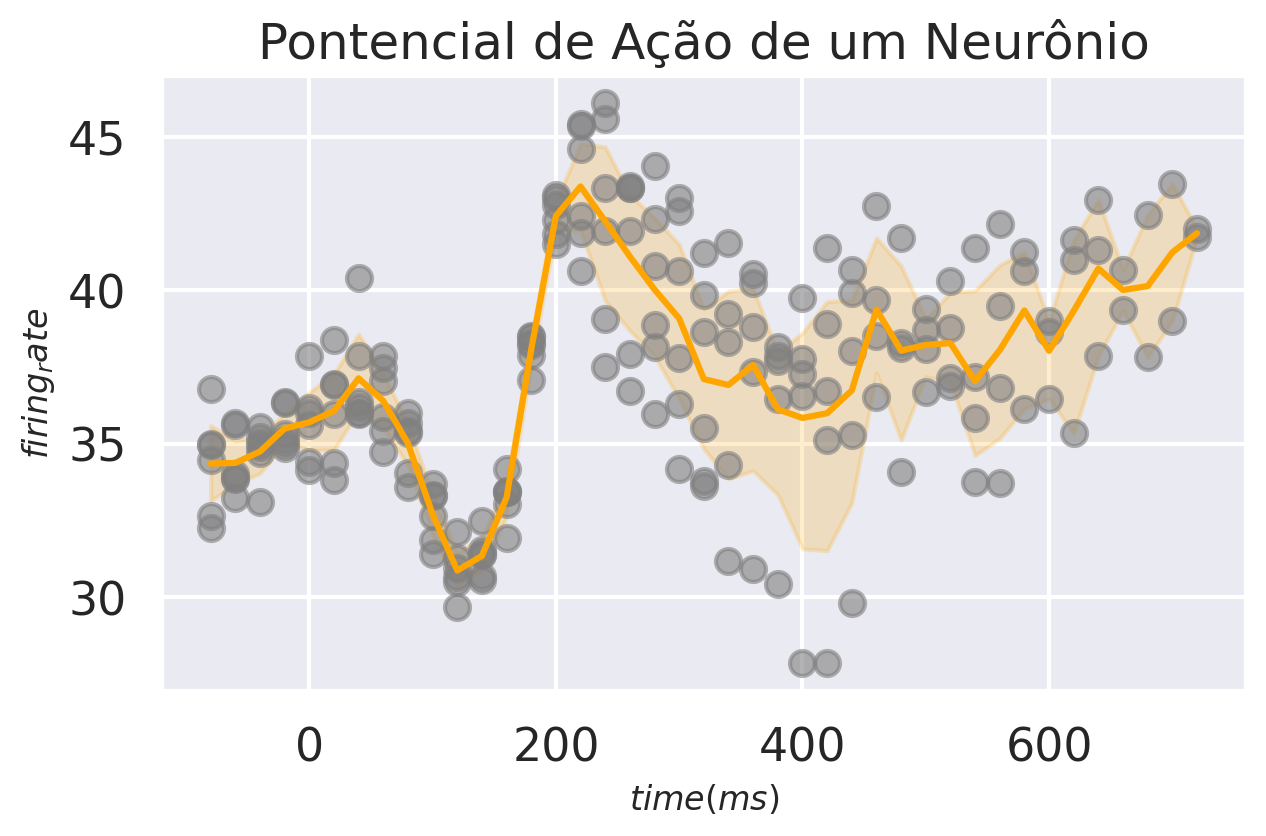

In [140]:
import seaborn as sns
dots = sns.load_dataset('dots')
dots = dots[(dots.choice == 'T2') & (dots['align'] == 'dots')]
dots = dots[['time','firing_rate']].reset_index(drop=True)
sns.lineplot(x=dots.time, y=dots.firing_rate,color='orange')
plt.scatter(x=dots.time, y=dots.firing_rate,color='gray',alpha=0.6)

plt.title('Pontencial de Ação de um Neurônio')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.show()

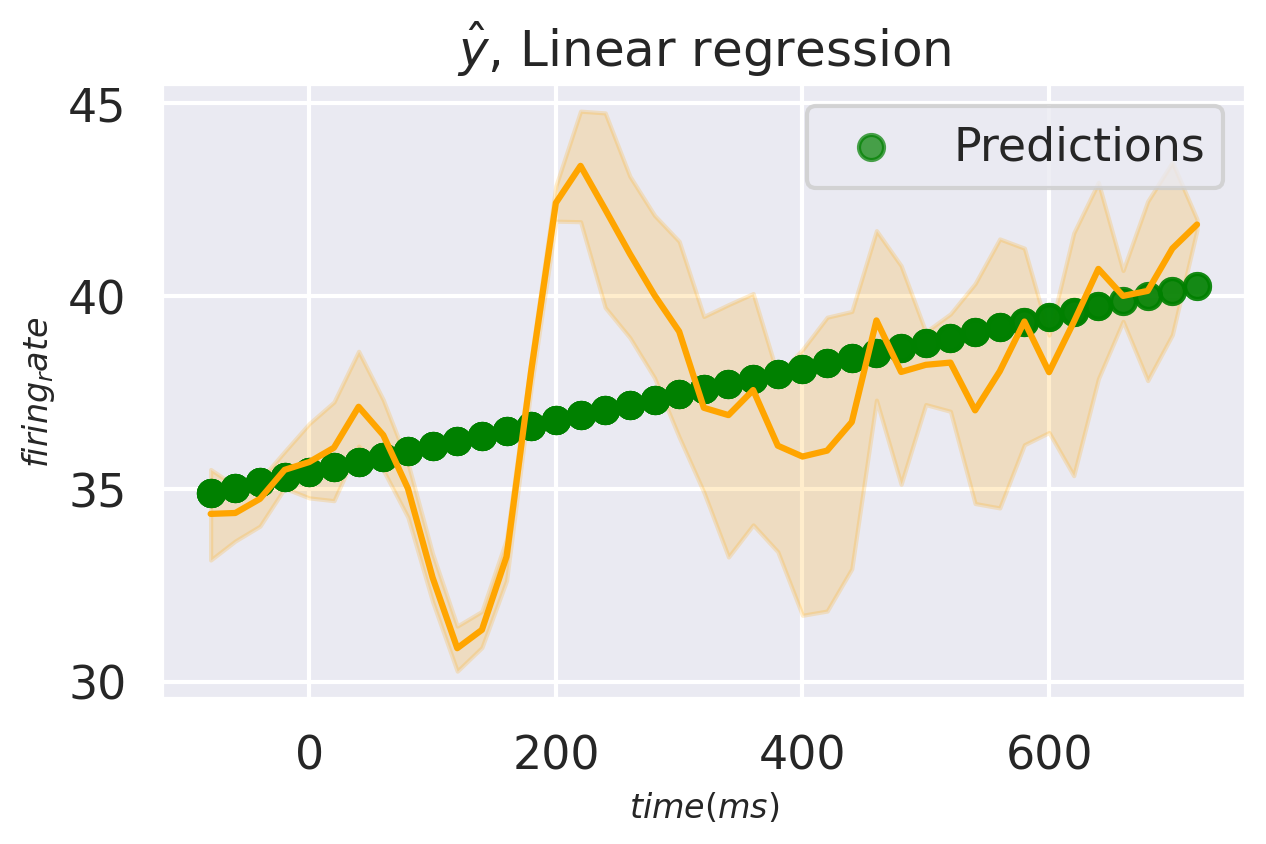

In [141]:
from sklearn import linear_model

X = dots[['time']]
y = dots.firing_rate

regressor = linear_model.LinearRegression()
regressor.fit(X,y)

y_pred = regressor.predict(X)

sns.lineplot(x=X.time,y=y,color='orange')
plt.scatter(X,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

plt.title('$\\hat{y}$' + ', Linear regression')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.legend()

plt.show()

#### sklearn Modelos

In [142]:
# !pip install xgboost
# !pip install lightgbm


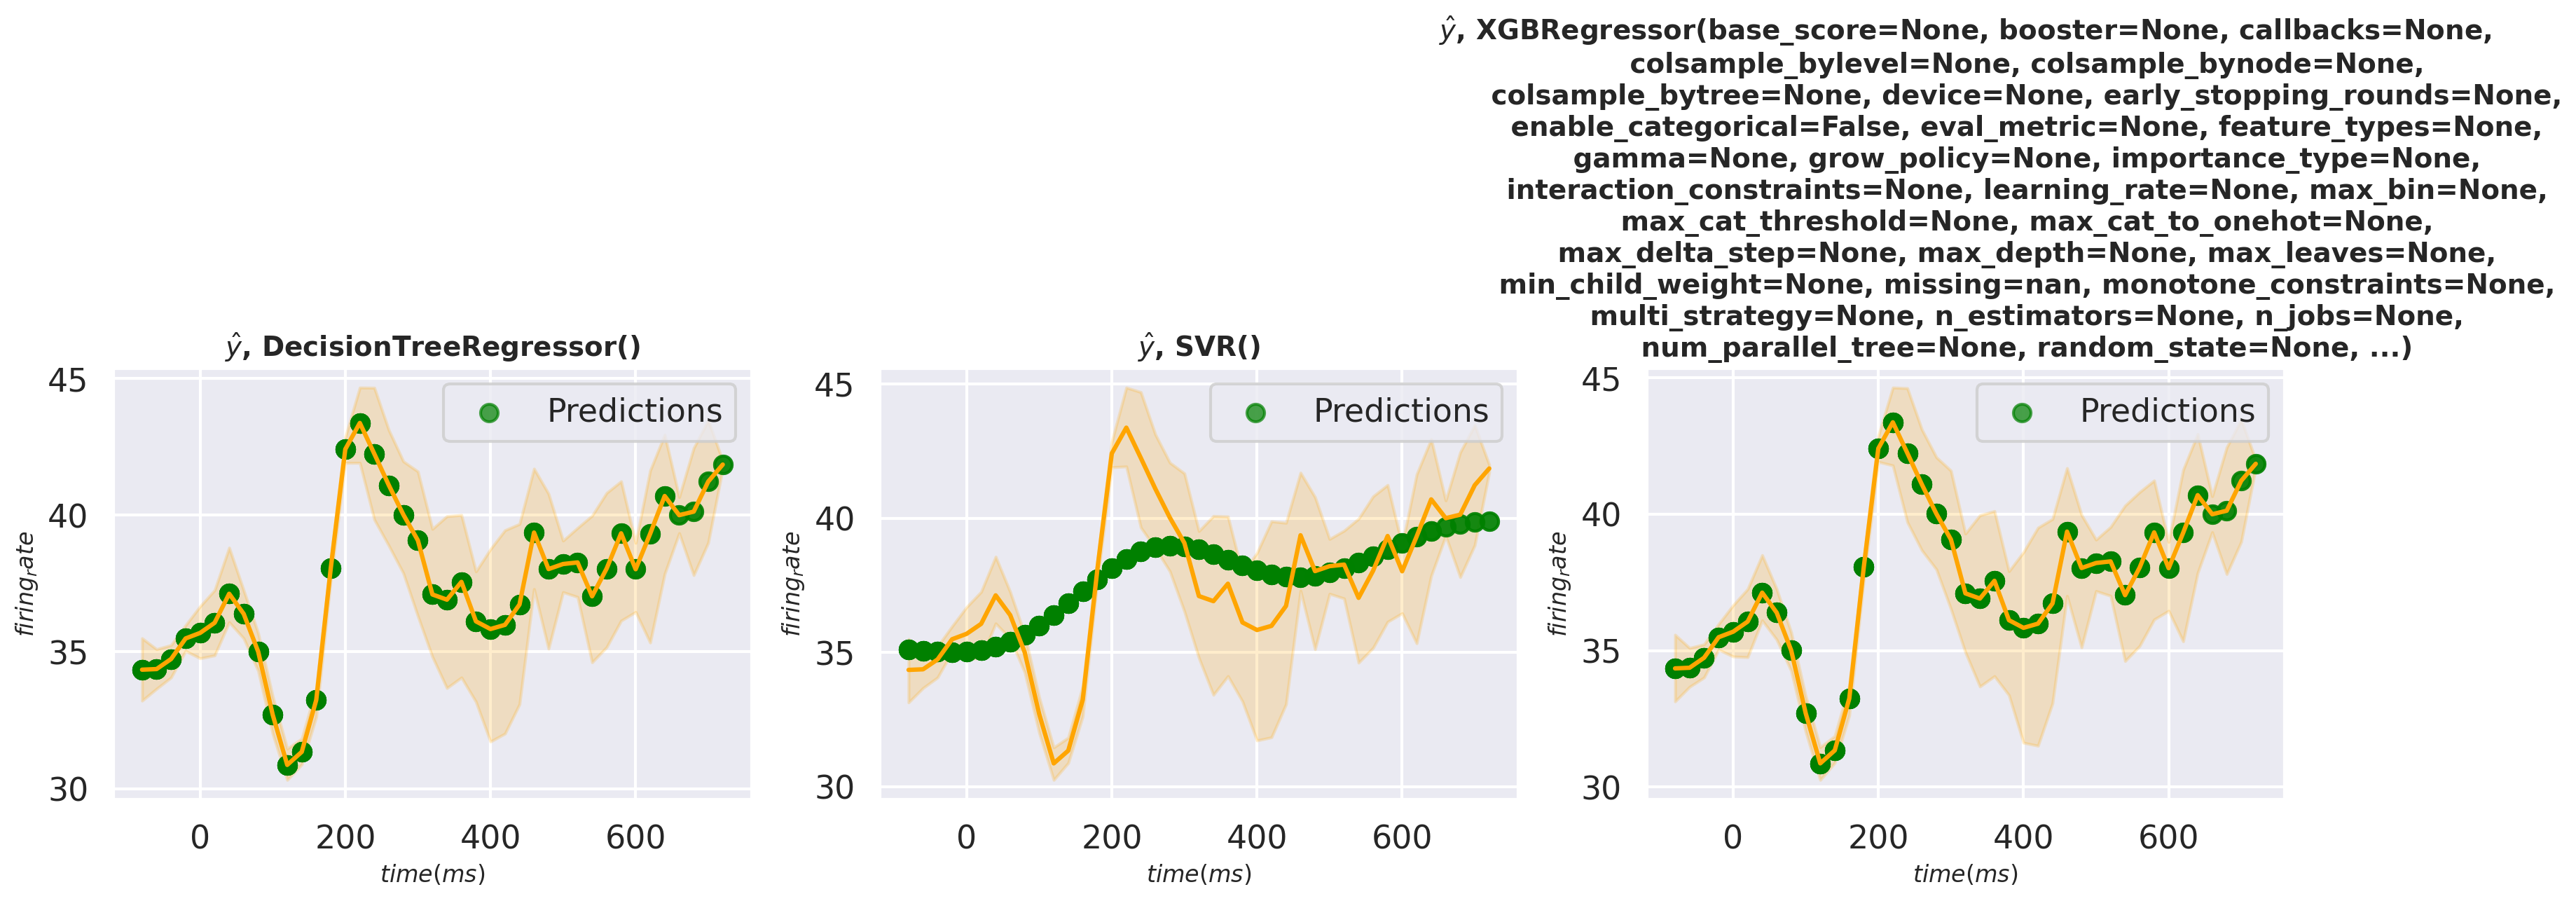

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas



X_train = X_test= dots[['time']]
y_train = dots.firing_rate

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()



In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas
from sklearn.model_selection import GridSearchCV

X = dots[['time']]
y = dots.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

base_estimators = [ MLPRegressor(max_iter=8000),
                    DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

param_grids = [ {'hidden_layer_sizes':[(32,),(8,8),(8,16,8)], 'activation': ['logistic','tanh'], 'solver':['sgd', 'adam']},
                {'max_depth':[3,4,5]},
                {},
                {}]

save_estimators = []

for i in range(len(base_estimators)):
  reg = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='neg_mean_squared_error')
  reg.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(reg.best_estimator_)
  save_estimators.append(reg.best_estimator_)
  print()
  print("MSE Mean Square Error:")
  print()
  y_pred = reg.predict(X_test)
  print(reg.score(X_test, y_test))
  print()


MLPRegressor(activation='logistic', hidden_layer_sizes=(32,), max_iter=8000)

MSE Mean Square Error:

-9.047107755550888

DecisionTreeRegressor(max_depth=4)

MSE Mean Square Error:

-3.432988535863749

SVR()

MSE Mean Square Error:

-7.82387506810357

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)



In [145]:
save_estimators

[MLPRegressor(activation='logistic', hidden_layer_sizes=(32,), max_iter=8000),
 DecisionTreeRegressor(max_depth=4),
 SVR(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)]

Veja mais em  
- [ Huber Regression ](#Huber-Regression )
- [ Theil-Sen ](#Theil-Sen )
- [ RANSAC Regression ](#RANSAC-Regression )



###### +

In [146]:
from sklearn.neighbors import KNeighborsClassifier

# Define as entradas e saídas do modelo
X = df2[['income','balance']]
y = df2['default']

# Define o modelo a ser empregado 
clf = KNeighborsClassifier(n_neighbors=3)

# Treina o modelo
clf.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

In [147]:
novo_credito = pd.DataFrame({'income':[31500], 'balance':[1000]})

clf.predict(novo_credito)

array([False])

___

In [148]:
df2 = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df2 = df2.drop(columns='bairro')
df2 = np.log(df2)
df2.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,3.465736,0.000000,0.000000,0.000000,0.000000,13.102161
1,5.056246,0.693147,0.693147,0.693147,0.693147,14.972392
2,5.323010,0.693147,1.098612,1.098612,1.098612,14.457364
3,5.262690,1.098612,1.098612,1.098612,1.098612,15.086675
4,4.753590,0.000000,1.098612,0.693147,0.693147,14.288634


In [149]:
df2_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})


In [150]:
X = df2[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df2['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
# model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# calculate_metrics(df2.preco, lm.predict(df2.drop(columns='preco')))
# print()

# Predição
y_pred = model.predict(np.log(df2_case))
print(f'Preço estimado (scikit-learn): {np.exp(y_pred[0]):.2f}')


Coeficientes:  {'areaM2': 3.2946860200052823, 'suites': -0.46343682756966564, 'dormitorios': -1.5903518226562143, 'vagas': -0.16344293354886352}
Intercept:  0.0
Score (R2):  -0.592856602827865

Preço estimado (scikit-learn): 1003353.60


### sns.lmplot

In [151]:
np.random.seed(1)
df = pd.DataFrame()

df['temperature'] = np.arange(0,45,1)
df['chirps'] = (20 * df['temperature'] - 4) / 16 
df['chirps'] = df['chirps'] + np.round(np.random.sample(len(df))*5,0)

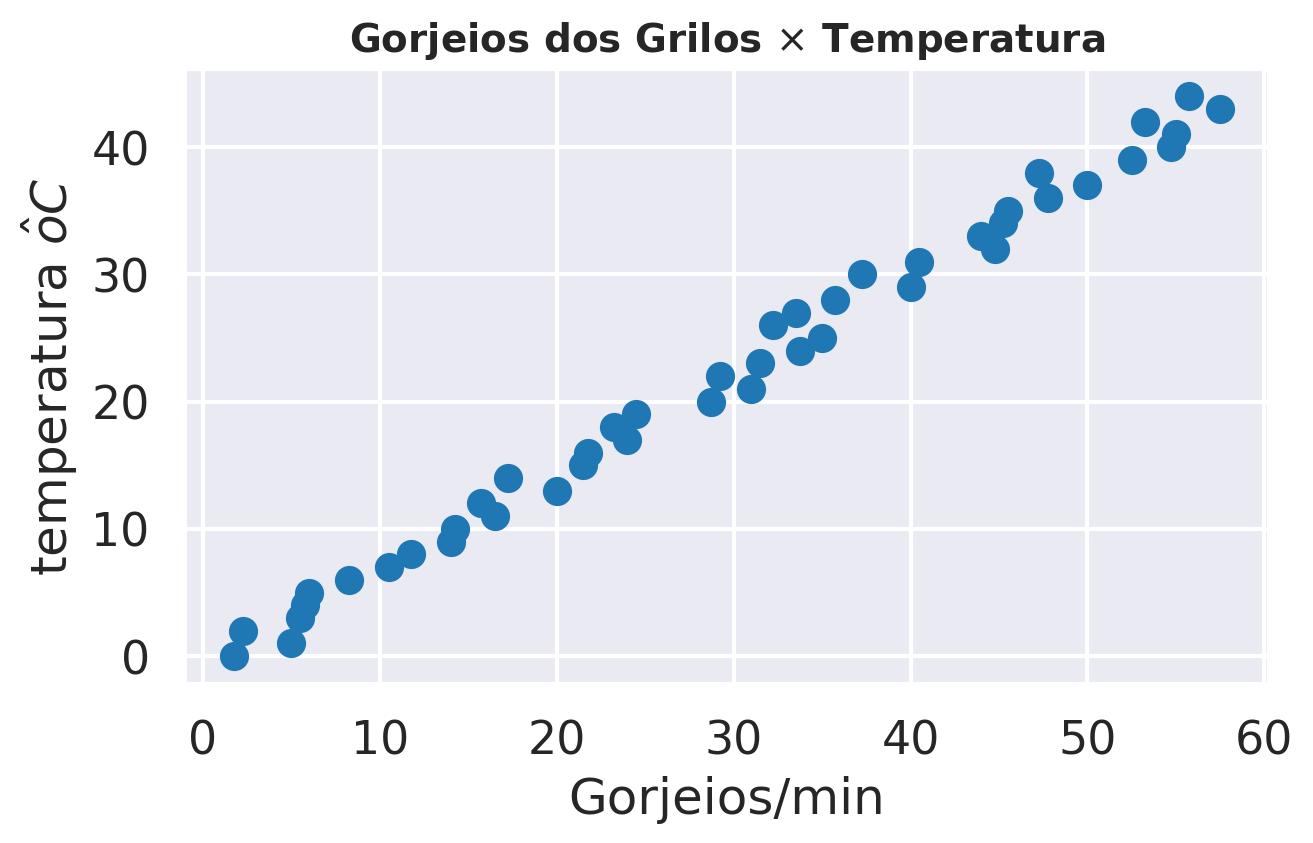

In [152]:
plt.scatter(df['chirps'],df['temperature'])

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

/home/anamarcacini/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


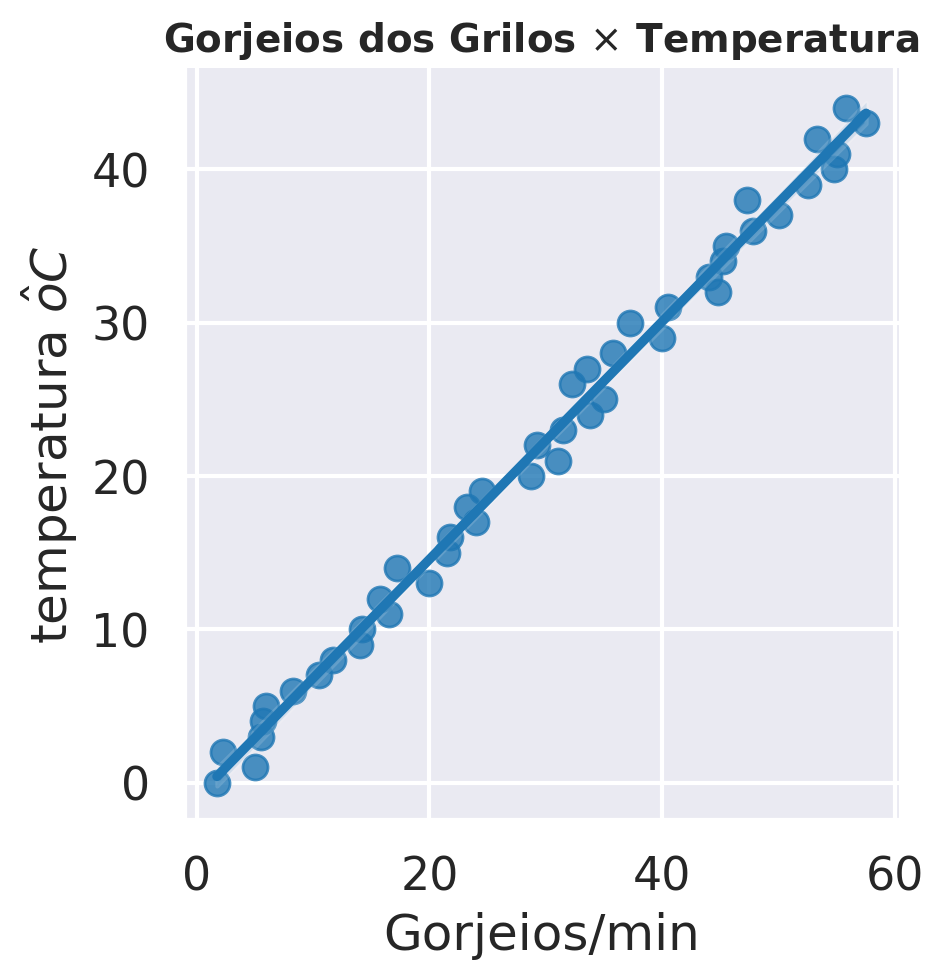

In [153]:
sns.lmplot(x='chirps',y='temperature', data=df)

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

### statsmodels -> OLS Regression Results


````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + a_1 x $$



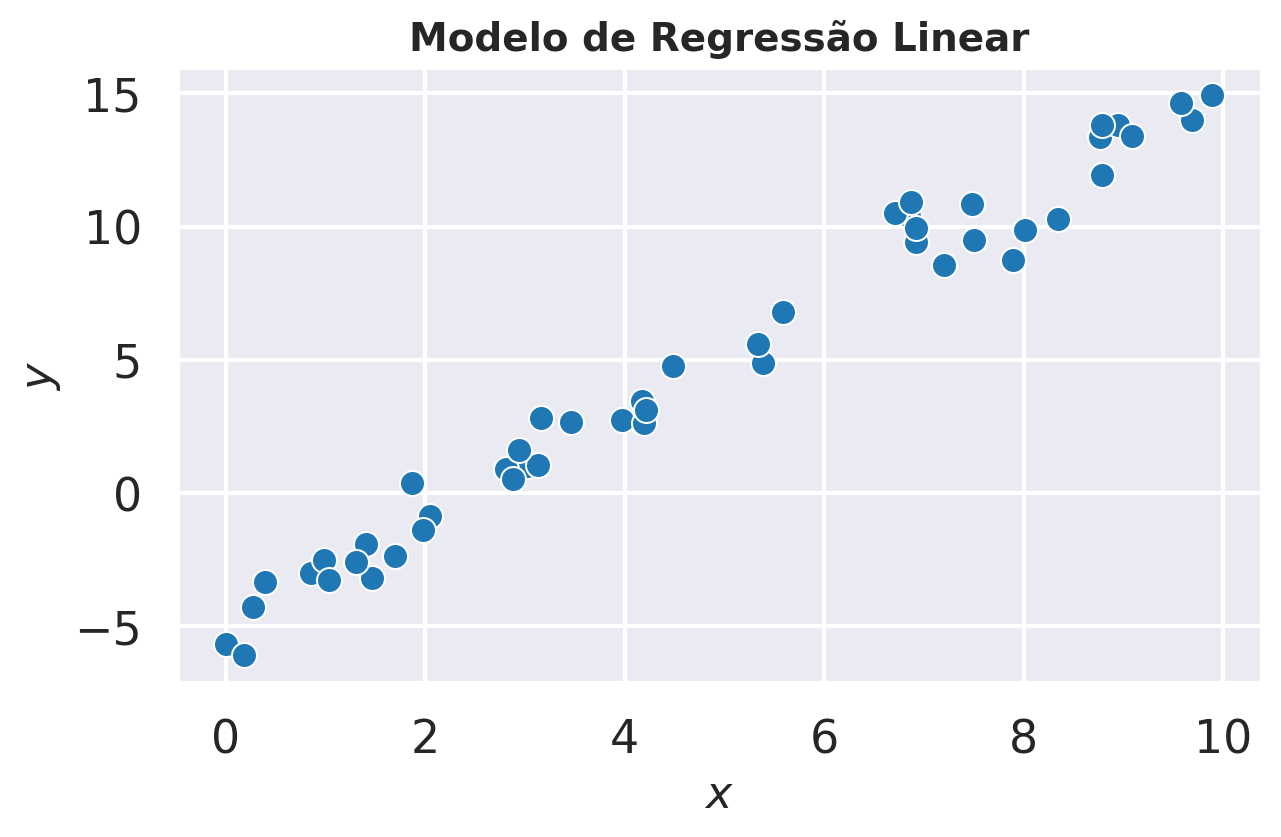

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           5.71e-42
Time:                        13:00:48   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

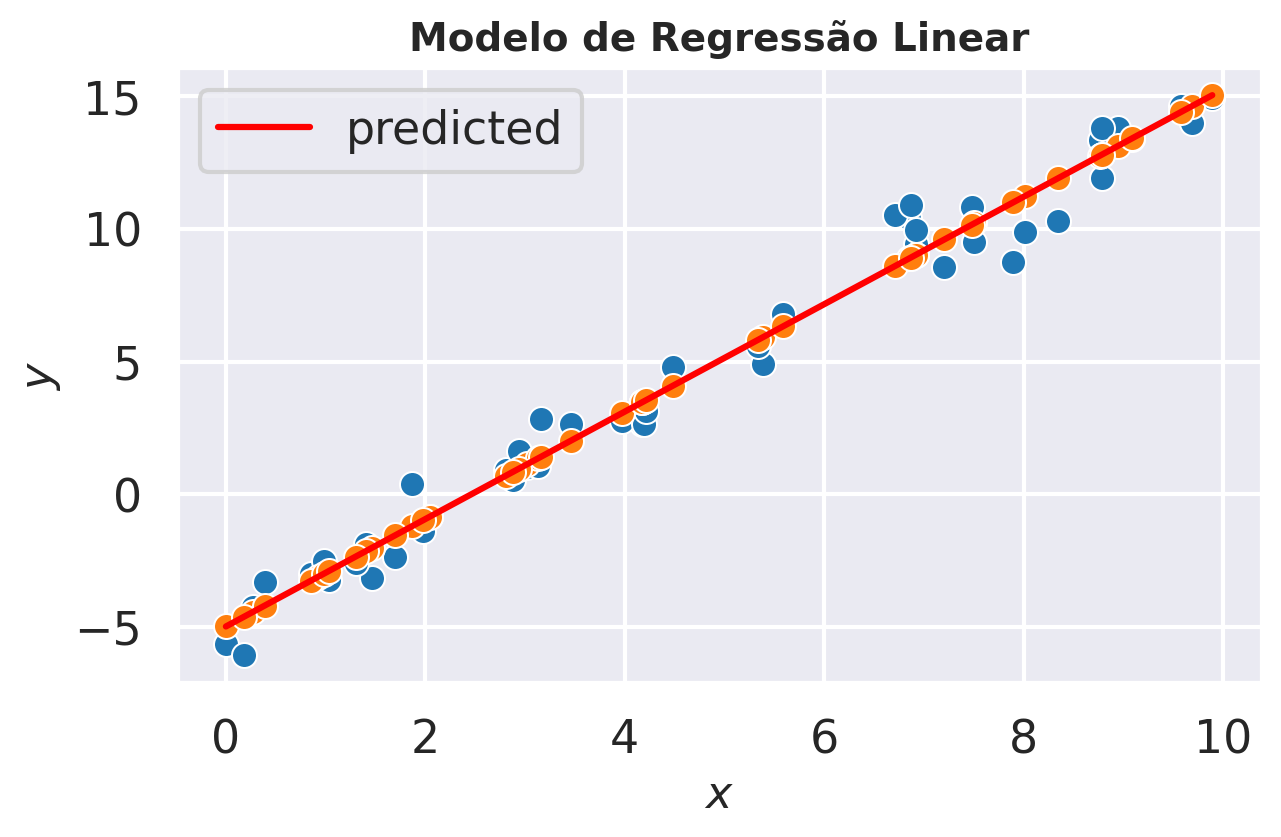

In [154]:
import statsmodels.formula.api as sm
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x=x, y=y)

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

# ______________________________________________________________________________________
df2 = pd.DataFrame({'x':x,'y':y})
df2.head()
#Para um modelo y <-x
        # ŷ = a0 + a1x
# Define o modelo
model = sm.ols(formula='y ~ x', data=df2)
# Treinamento
result = model.fit()
print(result.summary())
# ______________________________________________________________________________________

df2['predicted'] = result.predict(df2.x)
sns.scatterplot(x='x',y='y',data=df2)
sns.scatterplot(x='x',y='predicted',data=df2)
sns.lineplot(x='x',y='predicted',data=df2,color='red', label='predicted')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

plt.legend()
plt.show()


 Analisando a Eficiência do Modelo

O Sumário acima ainda traz o Coeficiente de Determinação e os *p-values* dos coeficientes. O primeiro você já conhece e é uma medida geral da eficiência do modelo.

$$ R^2 = 0.979 $$

Esse é um valor bastante próximo de 1 e que garante termos um modelo que explica bastante bem os dados.

Outra medida importante de se observar são os $p-values$ dos coeficientes. Eles são um teste de hipótese sobre os valores dos coeficientes onde a hipótese nula é de que os coeficientes são não significativos ($= 0$). A hipótese alternativa é de que o coeficiente é significativo (e, portanto $\ne 0$). Assim, $ p-values < 0.05 $ indicarão que o coeficiente é significativo para o modelo e podemos observar que para os dois coeficientes acima (`Intercept` e `x`) os valores são significativos.

$$ p-value(a_i) < 0.05 \Rightarrow a_i \space \text{é Significativo} $$

Podemos assim, dizer que

$$ \hat y = -4.9986 + 2.0272 x $$ 

é um modelo que aproxima bastante bem os dados.

Existem várias outras métricas nos resultados acima, mas para os nossos propósitos a análise acima já é suficiente.

> **$R^2$ qual é um bom valor? Novamente não existe um modelo 'certo' e a questão é melhor formulada em termos de: qual é um bom resultado para os seus propósitos? Mas de modo geral valores $R^2 > 0.8$ já são bastante úteis mesmo para predições e com valores abaixo $R^2 < 0.6$ recomendaríamos buscar outros modelos de aproximação dos dados.**


In [155]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='temperature ~ chirps', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5334.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           9.94e-47
Time:                        13:00:48   Log-Likelihood:                -70.585
No. Observations:                  45   AIC:                             145.2
Df Residuals:                      43   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9595      0.361     -2.659      0.0

In [156]:
modelo = sm.ols(formula='preco ~ areaM2  + suites + dormitorios + banheiros + vagas', data=Estimador_preco_imovel)
modelo = modelo.fit()
    # ŷ = a0 + a1x1 + a2x2 + ......
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:00:48   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1713.8448   4.06e+04      0.042      

In [157]:
# GABARITO
modelo2 = sm.ols(formula='preco ~ areaM2  + suites + dormitorios + vagas -1', data=Estimador_preco_imovel) # -1 tira o intercept (a constante)
modelo2 = modelo2.fit()
print(modelo2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:00:48   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [158]:
# Com variavel menor
modelo3 = sm.ols(formula='preco ~ areaM2  + bairro + suites + dormitorios + banheiros + vagas', data=Estimador_preco_imovel)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1611.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:00:48   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3731   BIC:                         1.087e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [159]:
# Cria o modelo com todas as variáveis preditoras, incluindo 'bairro'
model_all = sm.ols(formula="preco ~ areaM2 + suites + dormitorios + vagas + bairro", data=Estimador_preco_imovel)
result_all = model_all.fit()
print(result_all.summary())

# Cria um DataFrame para a previsão, incluindo o bairro 'vila-mariana'
x_new = pd.DataFrame({'areaM2': [134], 'suites': [1], 'dormitorios': [4], 'vagas': [2], 'bairro': ['vila-mariana']})

# Faz a previsão
predicted_price_all = result_all.predict(x_new)
print("Predicted price (all predictors):", predicted_price_all[0])

# - O statsmodels automaticamente converte a variável categórica 'bairro' em variáveis dummy (indicadoras).
# - Cada bairro, exceto um (que serve como referência), terá sua própria variável dummy no modelo.
# - Os coeficientes para as variáveis dummy representam o efeito de cada bairro no preço em relação ao bairro de referência.

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:00:48   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

#### Parametros do OLS

In [160]:

# lm.params
# lm.params[0]
# lm.params.Intercept

In [161]:

Gorjeios_Observados = 32
Temperatura_Estimada = lm.params.Intercept +lm.params.chirps * Gorjeios_Observados 
print(f'{Temperatura_Estimada:.2f} oC')
Gorjeios_Observados = 32
Temperatura_Estimada = -0.9595 + 0.7761 * Gorjeios_Observados 
print(f'{Temperatura_Estimada:.2f} oC')

23.88 oC
23.88 oC


In [162]:
lm.pvalues # teste de hipotese

Intercept    1.095724e-02
chirps       9.939203e-47
dtype: float64

###### Não podemos afirmar que o atributo que influencia mais o preço em termos absolutos é o valor com o maior coeficiente sendo preciso normalizar os dados

Já que a coluna com valores mais altos é terá coeficientes melhores que os demais

(ex: os cm² do app terá um coeff menos significativo que o m²

#### Como o `statsmodels` preve os dados

In [163]:
dados = pd.DataFrame()
dados['X'] = np.arange(0,100)
dados['y'] = 2*dados['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='y ~ X', data=dados).fit()
print(lm.summary())
print()

print(np.round(lm.predict()))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.482e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.41e-225
Time:                        13:00:48   Log-Likelihood:                -23.571
No. Observations:                 100   AIC:                             51.14
Df Residuals:                      98   BIC:                             56.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4885      0.061     24.235      0.0

#### Interações

In [166]:
lms = [sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:vagas - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:suites - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:suites + areaM2:vagas - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + vagas + dormitorios:suites + areaM2:vagas - 1', data=Estimador_preco_imovel)]

for lm in lms:
  lm = lm.fit()
  print(lm.summary())
  print()

  # calculate_metrics(Estimador_preco_imovel.preco, lm.predict(Estimador_preco_imovel.drop(columns='preco')))
  # print()

  preco = lm.predict(df_case)
  print(lm.rsquared)
  print()
  print(f'Preço estimado: {preco[0]:.2f}')
  print()

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              6589.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:03:49   Log-Likelihood:                         -55098.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3736   BIC:                                  1.102e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Tratando os parametros

In [167]:
parametros = pd.DataFrame()


In [168]:
parametros["parametros"] = lm.params
type(parametros)

pandas.core.frame.DataFrame

In [169]:
parametros

,parametros
areaM2,3588.439952
suites,606383.276392
vagas,-91523.066462
dormitorios:suites,-129541.372637
areaM2:vagas,2563.087341


In [170]:

parametros = pd.DataFrame()
parametros["parametros"] = lm.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros


,parametros,ABS
vagas,1.895237e-07,1.895237e-07
dormitorios:suites,2.213847e-50,2.213847e-50
areaM2,1.294344e-54,1.294344e-54
suites,2.627022e-69,2.627022e-69
areaM2:vagas,1.243170e-203,1.243170e-203


In [171]:

parametros = pd.DataFrame()
parametros["parametros"] = modelo.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros


,parametros,ABS,SIGNIFICATIVO
Intercept,9.662901e-01,9.662901e-01,False
banheiros,1.048334e-01,1.048334e-01,False
suites,8.361773e-38,8.361773e-38,True
dormitorios,6.172685e-64,6.172685e-64,True
vagas,1.082706e-74,1.082706e-74,True
areaM2,6.816549e-270,6.816549e-270,True


In [172]:
pd.DataFrame(modelo.summary().tables[1].data[1::], columns=modelo.summary().tables[1].data[0]).set_index('')

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1713.8448,4.06e+04,0.042,0.966,-7.78e+04,8.12e+04
areaM2,1.05e+04,274.850,38.206,0.000,9962.080,1.1e+04
suites,2.128e+05,1.64e+04,12.996,0.000,1.81e+05,2.45e+05
dormitorios,-3.046e+05,1.77e+04,-17.210,0.000,-3.39e+05,-2.7e+05
banheiros,-1.681e+04,1.04e+04,-1.622,0.105,-3.71e+04,3507.003
vagas,2.992e+05,1.6e+04,18.704,0.000,2.68e+05,3.31e+05


In [173]:
pd.DataFrame(modelo.pvalues).sort_values(by=0)

,0
areaM2,6.816549e-270
vagas,1.082706e-74
dormitorios,6.172685e-64
suites,8.361773e-38
banheiros,1.048334e-01
Intercept,9.662901e-01


##### ANALISE DO Pvalues

In [174]:
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros

,parametros,ABS,SIGNIFICATIVO
Intercept,9.662901e-01,9.662901e-01,False
banheiros,1.048334e-01,1.048334e-01,False
suites,8.361773e-38,8.361773e-38,True
dormitorios,6.172685e-64,6.172685e-64,True
vagas,1.082706e-74,1.082706e-74,True
areaM2,6.816549e-270,6.816549e-270,True


#### Predição

In [175]:
# preco ~ areaM2  + suites + dormitorios + vagas
x = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
preco_estimado = modelo2.predict(x)[0]

print(f'Preço estimado (US$ 1000): {preco_estimado:.2f}')

Preço estimado (US$ 1000): 949268.27


### Comparação

In [177]:
#IA COPILOT
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

Estimador_preco_imovel_4pred = Estimador_preco_imovel[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = Estimador_preco_imovel['preco']

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(Estimador_preco_imovel_4pred)

model = LinearRegression()
model.fit(scaled_x, y)

x_new = np.array([[134, 1, 4, 2]])
x_new_scaled = scaler.transform(x_new)
predicted_price = model.predict(x_new_scaled)

print("Predicted price (scikit-learn):", predicted_price[0])

# print("Predicted price (statsmodels):", (result.predict(x) * (Estimador_preco_imovel['preco'].max() - Estimador_preco_imovel['preco'].min()) + Estimador_preco_imovel['preco'].min()).values[0])

# Os preços previstos dos modelos scikit-learn e stats podem diferir ligeiramente devido às diferentes formas de lidar com o termo de interceptação.
# Statsmodels exclui explicitamente a interceptação na fórmula ("- 1"), enquanto o scikit-learn a inclui por padrão.
# Isso pode levar a pequenas variações nos coeficientes calculados e nas previsões.

Predicted price (scikit-learn): 950278.0028634971


/home/anamarcacini/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Volte a considerar os valores normais, sem aplicação do log. Crie modelos de normalização considerando as interações:

* dormitorios+vagas
* dormitorios+suites
* dormitorios+suites e areaM2+vagas

Considerando somente coeficientes significativos.

Qual o R2 e a predição do melhor modelo para o novo caso?

In [282]:
lms = [sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:vagas - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:suites - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas +  dormitorios:suites + areaM2:vagas - 1', data=Estimador_preco_imovel),
       sm.ols(formula='preco ~ areaM2 + suites + vagas + dormitorios:suites + areaM2:vagas - 1', data=Estimador_preco_imovel)]

for lm in lms:
  lm = lm.fit()
  print(lm.summary())
  print()

  # calculate_metrics(Estimador_preco_imovel.preco, lm.predict(Estimador_preco_imovel.drop(columns='preco')))
  # print()

  preco = lm.predict(df_case)
  print(lm.rsquared)
  print()
  print(f'Preço estimado: {preco[0]:.2f}')
  print()

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              6589.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:10:34   Log-Likelihood:                         -55098.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3736   BIC:                                  1.102e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Reconstrua o melhor modelo do exercício anterior com o scikit-learn.

In [283]:
df2 = Estimador_preco_imovel.copy()
df2['dormitorios:suites'] = df2['dormitorios'] * df2['suites']
df2['areaM2:vagas'] = df2['areaM2'] * df2['vagas']

df_case['dormitorios:suites'] = df_case['dormitorios'] * df_case['suites']
df_case['areaM2:vagas'] = df_case['areaM2'] * df_case['vagas']

display(df2.head())
display(df_case)

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco,dormitorios:suites,areaM2:vagas
0,vila-nova-conceicao,32,1,1,1,1,490000,1,32
1,vila-nova-conceicao,157,2,2,2,2,3180000,4,314
2,vila-nova-conceicao,205,2,3,3,3,1900000,6,615
3,vila-nova-conceicao,193,3,3,3,3,3565000,9,579
4,vila-nova-conceicao,116,1,3,2,2,1605000,3,232


,areaM2,suites,dormitorios,vagas,dormitorios:suites,areaM2:vagas
0,134,1,4,2,4,268


In [288]:
X = df2.drop(columns=['preco','banheiros','dormitorios',"bairro"])
y = df2['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
model.fit(X, y)

print("Coeficientes: ", model.feature_names_in_)
print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# from sklearn.metrics import r2_score
# print("Score (R2)B: ", r2_score(y, model.predict(df2.drop(columns=['preco','banheiros','dormitorios']))))

calculate_metrics(df2.preco, model.predict(df2.drop(columns=['preco','banheiros','dormitorios',"bairro"])))
print()

# Predição
y_pred = model.predict(df_case.drop(columns='dormitorios'))

Coeficientes:  ['areaM2' 'suites' 'vagas' 'dormitorios:suites' 'areaM2:vagas']
Coeficientes:  {'areaM2': 3588.4399521448354, 'suites': 606383.2763916976, 'vagas': -91523.06646181596, 'dormitorios:suites': -129541.37263719193, 'areaM2:vagas': 2563.087340982631}
Intercept:  0.0
Score (R2):  0.7034378664247192

MSE: 341735899922.54
RMSE: 584581.82
MAPE: 25.25
MAE: 380329.39
sMAPE: 23.00
MAD: 773278.64



### Metricas


Veja [A Comprehensive Overview of Regression Evaluation Metrics](https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/) e [Metrics and scoring: quantifying the quality of predictions](
https://scikit-learn.org/stable/modules/model_evaluation.html)

In [230]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)


In [231]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df = df.drop(columns='bairro')
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


In [232]:
df_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})
df_case


,areaM2,suites,dormitorios,vagas
0,134,1,4,2


#### ols 

In [233]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas', data=df)
# lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df)
lm = lm.fit()
print(lm.summary())
print()

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()

preco = lm.predict(df_case)
print()
print(f'Preço estimado: {preco[0]:.2f}')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2027.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:07:58   Log-Likelihood:                -55099.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3736   BIC:                         1.102e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3407.3121   4.04e+04     -0.084      

In [234]:

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()


MSE: 363479068155.80
RMSE: 602892.25
MAPE: 27.16
MAE: 398507.18
sMAPE: 24.81
MAD: 773278.64



#### `Scikit-learn`


In [235]:
X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

# model = LinearRegression(fit_intercept=False) # set fit_intercept to False
model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'areaM2': 10468.461739070792, 'suites': 202771.70454037527, 'dormitorios': -311340.86561812006, 'vagas': 296751.59991048346}
Intercept:  -3407.312060851371
Score (R2):  0.6845689083685004

MSE: 363479068155.80
RMSE: 602892.25
MAPE: 27.16
MAE: 398507.18
sMAPE: 24.81
MAD: 773278.64

Preço estimado (scikit-learn): 950278.00


In [236]:
df = pd.DataFrame()
df['X'] = np.arange(0,100)
df['y'] = 2*df['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='y ~ X', data=df).fit()
print(lm.summary())
print()

print(np.round(lm.predict()))



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.839e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.03e-227
Time:                        13:07:58   Log-Likelihood:                -18.675
No. Observations:                 100   AIC:                             41.35
Df Residuals:                      98   BIC:                             46.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4980      0.058     25.615      0.0

In [237]:
df = pd.DataFrame()
df['X'] = np.arange(0,100)
df['y'] = 2*df['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='np.log1p(y) ~ np.log1p(X)', data=df).fit()
print(lm.summary())
print()

print(np.round(np.exp(lm.predict())))
print(np.round(np.exp(lm.predict(df['X'])).values))


                            OLS Regression Results                            
Dep. Variable:            np.log1p(y)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.866e+05
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.97e-190
Time:                        13:07:58   Log-Likelihood:                 310.08
No. Observations:                 100   AIC:                            -616.2
Df Residuals:                      98   BIC:                            -611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7496      0.004    167.639      

## Tratamento de dados

### Divisão pelo valor máximo

Lembre de converter o resultado e os parametros para essa nova medida

In [238]:
normalizado = Estimador_preco_imovel.copy()

In [239]:
valoresMax=normalizado.max()
valoresMax

bairro         vila-sonia
areaM2                299
suites                  6
dormitorios             6
banheiros               9
vagas                   5
preco             8000000
dtype: object

In [240]:
for coluna in normalizado.columns:
  if coluna != 'bairro' :
    print(coluna)
    normalizado[coluna] = normalizado[coluna] / normalizado[coluna].max()
#
normalizado.head()

areaM2
suites
dormitorios
banheiros
vagas
preco


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,vila-nova-conceicao,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,vila-nova-conceicao,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,vila-nova-conceicao,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,vila-nova-conceicao,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [241]:
normalizado2 = Estimador_preco_imovel.copy()
# Verifique que os mesmos resultados podem ser obtidos normalizando apenas as variáveis preditoras. preditoras - > apenas os parametros não o preço
for coluna in normalizado2.columns:
  if coluna != 'preco' and coluna != 'bairro' :
    print(coluna)
    normalizado2[coluna] = normalizado2[coluna] / normalizado2[coluna].max()
#
normalizado2.head()

areaM2
suites
dormitorios
banheiros
vagas


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.107023,0.166667,0.166667,0.111111,0.2,490000
1,vila-nova-conceicao,0.525084,0.333333,0.333333,0.222222,0.4,3180000
2,vila-nova-conceicao,0.685619,0.333333,0.500000,0.333333,0.6,1900000
3,vila-nova-conceicao,0.645485,0.500000,0.500000,0.333333,0.6,3565000
4,vila-nova-conceicao,0.387960,0.166667,0.500000,0.222222,0.4,1605000


In [242]:
# seu código
x = pd.DataFrame({'areaM2': [134/(Estimador_preco_imovel['areaM2'].max())], 'suites': [1/(Estimador_preco_imovel['suites'].max())], 'dormitorios': [4/(Estimador_preco_imovel['dormitorios'].max())], 'vagas': [2/(Estimador_preco_imovel['vagas'].max())]})

model = sm.ols(formula="preco ~ areaM2 + suites + dormitorios + vagas - 1", data=normalizado)
result = model.fit()
print(result.summary())

result.predict(x) * Estimador_preco_imovel['preco'].max()

# 949268.265645

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:07:58   Log-Likelihood:                          4363.9
No. Observations:                3741   AIC:                                     -8720.
Df Residuals:                    3737   BIC:                                     -8695.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

0    949268.265645
dtype: float64

a área é o atributo que mais influencia no modelo

In [243]:
result.predict(x) * Estimador_preco_imovel['preco'].max()

0    949268.265645
dtype: float64

### MinMAx

In [244]:
normalizado = Estimador_preco_imovel.copy()

In [245]:
maximosEminimos = pd.DataFrame()
maximosEminimos["max"] = normalizado.max()
maximosEminimos["min"] = normalizado.min()
maximosEminimos

,max,min
bairro,vila-sonia,morumbi
areaM2,299,20
suites,6,1
dormitorios,6,1
banheiros,9,1
vagas,5,1
preco,8000000,280000


O retorno da regressão logistica é uma porcentagem --> ela é um separador linear

Regressãp logistica sempre faz uma reta

In [246]:

for coluna in normalizado.columns:
  if coluna != 'preco' and coluna != 'bairro' :
    print(coluna)
    normalizado[coluna] = (normalizado[coluna] - normalizado[coluna].min()) / (normalizado[coluna].max()-normalizado[coluna].min())
#
normalizado.head()

areaM2
suites
dormitorios
banheiros
vagas


,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,0.043011,0.0,0.0,0.000,0.00,490000
1,vila-nova-conceicao,0.491039,0.2,0.2,0.125,0.25,3180000
2,vila-nova-conceicao,0.663082,0.2,0.4,0.250,0.50,1900000
3,vila-nova-conceicao,0.620072,0.4,0.4,0.250,0.50,3565000
4,vila-nova-conceicao,0.344086,0.0,0.4,0.125,0.25,1605000


In [247]:
df = Estimador_preco_imovel

In [248]:
df_scaled = df.drop(columns=["bairro"]) / df.max()

# df_scaled = df.drop(columns=['preco']) / df.drop(columns=['preco']).max()
# df_scaled['preco'] = df['preco']

df_scaled.head()

,areaM2,bairro,banheiros,dormitorios,preco,suites,vagas
0,0.107023,NaN,0.111111,0.166667,0.06125,0.166667,0.2
1,0.525084,NaN,0.222222,0.333333,0.3975,0.333333,0.4
2,0.685619,NaN,0.333333,0.5,0.2375,0.333333,0.6
3,0.645485,NaN,0.333333,0.5,0.445625,0.5,0.6
4,0.38796,NaN,0.222222,0.5,0.200625,0.166667,0.4


### Multiplicação dos dados 

In [249]:
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
mtcars = mtcars.data
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [250]:
# bonus
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(mtcars[["wt", "am"]])
pd.DataFrame(X_tr, columns=poly.get_feature_names_out())


,1,wt,am,wt am
0,1.0,2.620,1.0,2.620
1,1.0,2.875,1.0,2.875
2,1.0,2.320,1.0,2.320
3,1.0,3.215,0.0,0.000
4,1.0,3.440,0.0,0.000
5,1.0,3.460,0.0,0.000
6,1.0,3.570,0.0,0.000
7,1.0,3.190,0.0,0.000
8,1.0,3.150,0.0,0.000
9,1.0,3.440,0.0,0.000


## Analises dos Dados

### Homocedasticidade

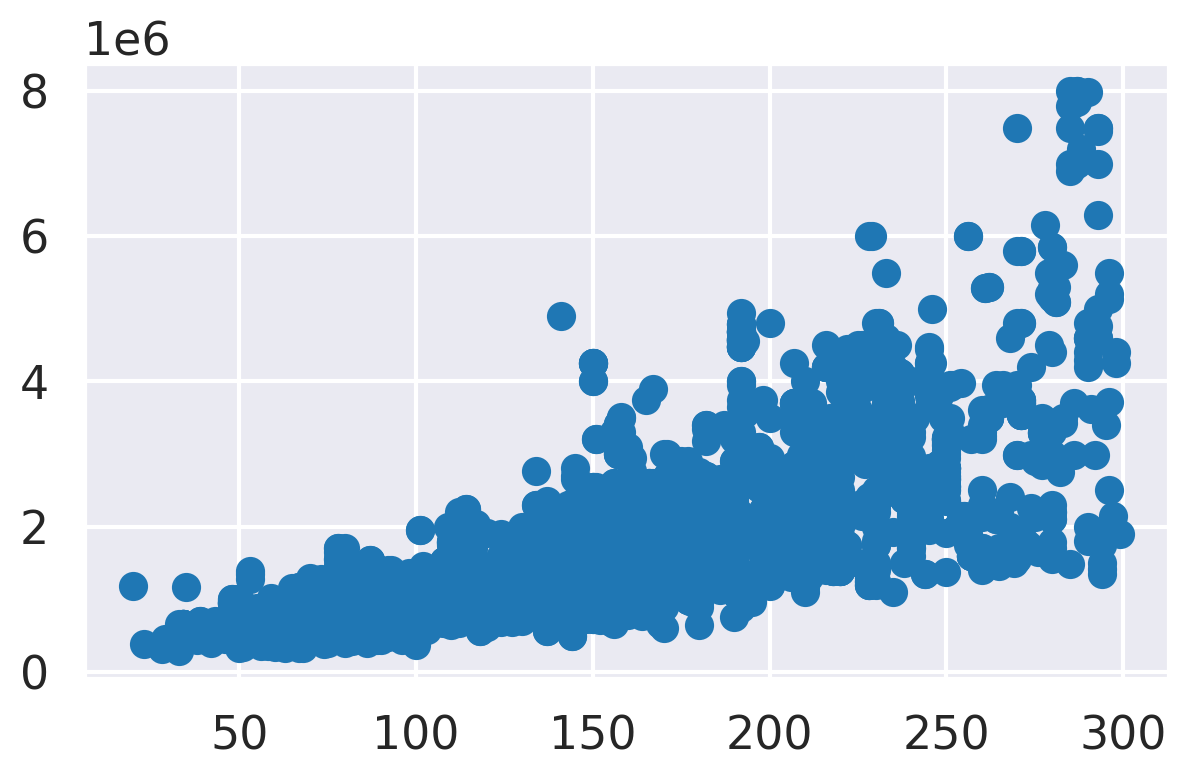

In [251]:
plt.scatter(df.areaM2, df.preco)
plt.show()

# Os dados possuem homocedasticidade --> os dados vão se distanciando conforme aumenta o valor de x

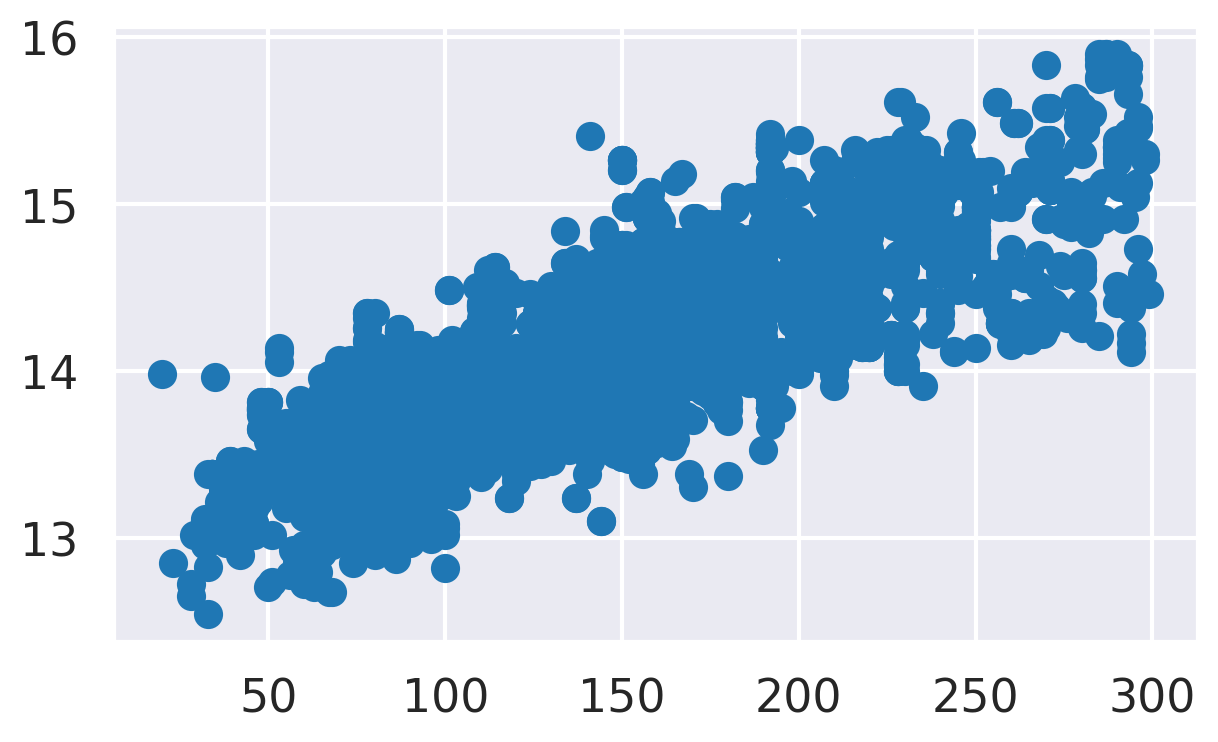

In [252]:
plt.scatter(df.areaM2, y =np.log(df.preco))
plt.show()

# Log é uma maneira de evitar isso

In [253]:
import statsmodels.formula.api as sm


####  `statsmodels` ols

In [254]:
# lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=Estimador_preco_imovel)
lm = sm.ols(formula='np.log(preco) ~ np.log(areaM2) + np.log(suites) + np.log(dormitorios) + np.log(vagas) - 1', data=Estimador_preco_imovel)
lm = lm.fit()
print(lm.summary())
print()

calculate_metrics(np.log(Estimador_preco_imovel.preco), lm.predict(Estimador_preco_imovel.drop(columns='preco')))
print()

preco = lm.predict(df_case) # note que o statsmodels faz as transformações informadas de forma AUTOMÁTICA das variáveis (veja abaixo)
print()
print(f'Preço estimado: {np.exp(preco[0]):.2f}') # mas ele não reverte a saída

                                 OLS Regression Results                                
Dep. Variable:          np.log(preco)   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.502e+05
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        13:07:59   Log-Likelihood:                         -4114.0
No. Observations:                3741   AIC:                                      8236.
Df Residuals:                    3737   BIC:                                      8261.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [255]:
dados = pd.DataFrame()
dados['X'] = np.arange(0,100)
dados['y'] = 2*dados['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='y ~ X', data=dados).fit()
print(lm.summary())
print()

print(np.round(lm.predict()))



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.263e+06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.17e-229
Time:                        13:07:59   Log-Likelihood:                -13.428
No. Observations:                 100   AIC:                             30.86
Df Residuals:                      98   BIC:                             36.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5112      0.055     27.232      0.0

In [256]:
dados = pd.DataFrame()
dados['X'] = np.arange(0,100)
dados['y'] = 2*dados['X'] + 1 + np.random.sample(100)

lm = sm.ols(formula='np.log1p(y) ~ np.log1p(X)', data=dados).fit()
print(lm.summary())
print()

print(np.round(np.exp(lm.predict())))
print(np.round(np.exp(lm.predict(dados['X'])).values))


                            OLS Regression Results                            
Dep. Variable:            np.log1p(y)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.917e+04
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.64e-144
Time:                        13:07:59   Log-Likelihood:                 202.97
No. Observations:                 100   AIC:                            -401.9
Df Residuals:                      98   BIC:                            -396.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7830      0.013     59.997      

In [257]:
lm = sm.ols(formula='y ~ X', data=dados).fit()

print(np.round(lm.predict()))
lm = sm.ols(formula='np.log1p(y) ~ np.log1p(X)', data=dados).fit()

print(np.round(np.exp(lm.predict())))
print(np.round(np.exp(lm.predict(dados['X'])).values))



[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  79.  81.  83.
  85.  87.  89.  91.  93.  95.  97.  99. 101. 103. 105. 107. 109. 111.
 113. 115. 117. 119. 121. 123. 125. 127. 129. 131. 133. 135. 137. 139.
 141. 143. 145. 147. 149. 151. 153. 155. 157. 159. 161. 163. 165. 167.
 169. 171. 173. 175. 177. 179. 181. 183. 185. 187. 189. 191. 193. 195.
 197. 199.]
[  2.   4.   6.   8.  11.  13.  15.  17.  19.  21.  23.  25.  27.  29.
  31.  33.  35.  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.
  59.  61.  63.  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.
  87.  89.  91.  93.  95.  97.  99. 101. 103. 105. 106. 108. 110. 112.
 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138. 140.
 142. 144. 146. 148. 150. 151. 153. 155. 157. 159. 161. 163. 165. 167.
 169. 171. 173. 175. 177. 179. 181. 183. 185. 187. 188. 190. 192.

#### `scikit-learn`

In [289]:
df = Estimador_preco_imovel.copy()
df = df.drop(columns='bairro')
df = np.log(df)
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,3.465736,0.000000,0.000000,0.000000,0.000000,13.102161
1,5.056246,0.693147,0.693147,0.693147,0.693147,14.972392
2,5.323010,0.693147,1.098612,1.098612,1.098612,14.457364
3,5.262690,1.098612,1.098612,1.098612,1.098612,15.086675
4,4.753590,0.000000,1.098612,0.693147,0.693147,14.288634


In [290]:
df_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})


In [292]:
X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
# model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# calculate_metrics(df.preco, lm.predict(df.drop(columns='preco')))
# print()

# Predição
y_pred = model.predict(np.log(df_case))
print(f'Preço estimado (scikit-learn): {np.exp(y_pred[0]):.2f}')


Coeficientes:  {'areaM2': 3.2946860200052823, 'suites': -0.46343682756966564, 'dormitorios': -1.5903518226562143, 'vagas': -0.16344293354886352}
Intercept:  0.0
Score (R2):  -0.592856602827865

Preço estimado (scikit-learn): 1003353.60


In [261]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

# Ajuste do modelo com intercepto
model = LinearRegression(fit_intercept=True)
model.fit(X, np.log(y))

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, np.log(y))) # R2

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {np.exp(y_pred[0]):.2f}')



Coeficientes:  {'areaM2': 0.006101632453103182, 'suites': 0.0944890002501395, 'dormitorios': -0.11950582010772533, 'vagas': 0.13930123742634104}
Intercept:  13.10099720909261
Score (R2):  0.7332241426641529
Preço estimado (scikit-learn): 998175.26


### Outliers

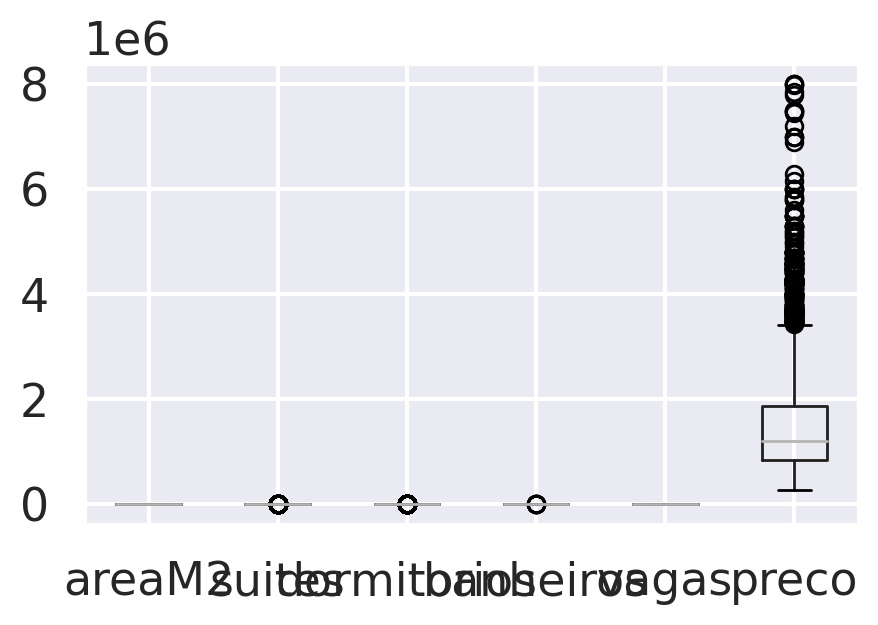

In [262]:
plt.figure(figsize=(5,3))

df.boxplot(figsize=(10,6))
plt.show()

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

# settings
sns.set_theme(context="talk", palette="tab10", color_codes=True, rc={"figure.figsize": [7, 4]})
%config InlineBackend.figure_format = "retina"

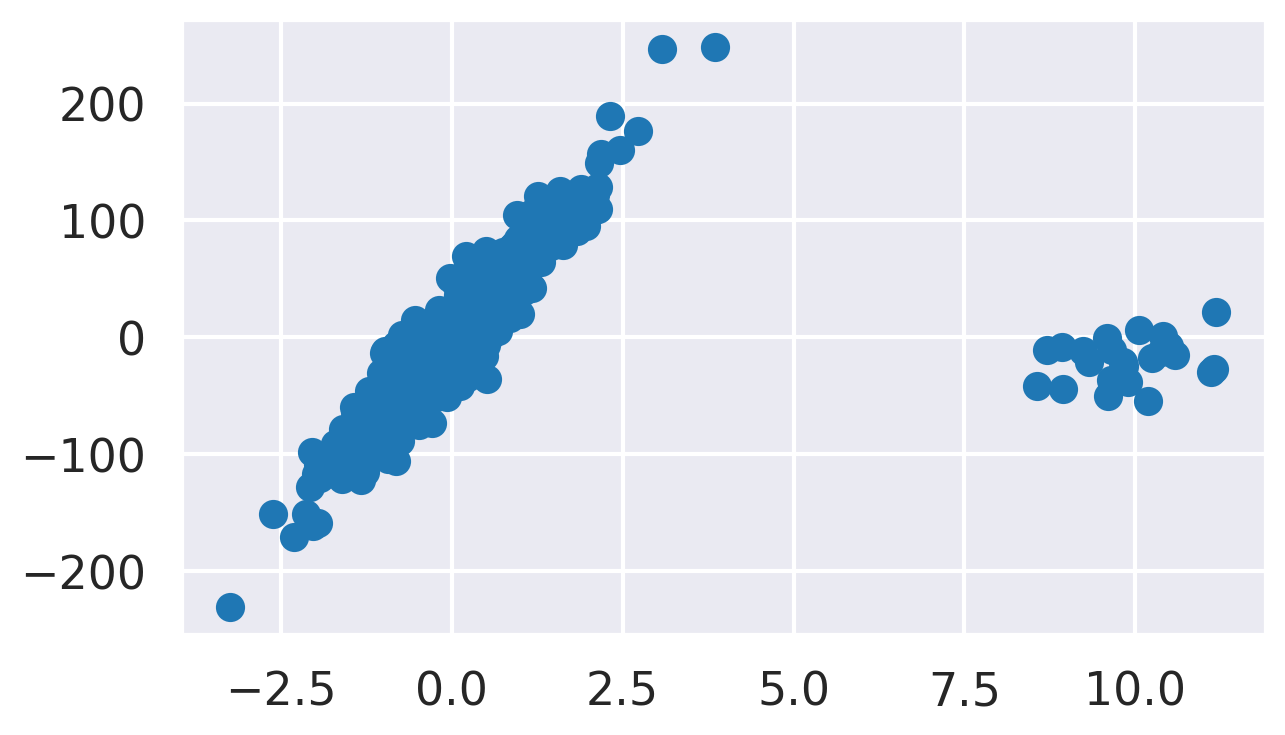

In [264]:
N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

In [265]:
# sanity check - see what the coefficient would be when fitted to data without outliers
lr = LinearRegression().fit(X[N_OUTLIERS:], y[N_OUTLIERS:])
lr.coef_[0]

63.3572430951796

#### Problema dos Outliers -- Necessidade de modelos robustos

In [266]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

fit_df

,linear_regression
-3.241267,-34.417132
-2.241267,-25.644817
-1.241267,-16.872502
-0.241267,-8.100187
0.758733,0.672128
1.758733,9.444443
2.758733,18.216758
3.758733,26.989073
4.758733,35.761388
5.758733,44.533703


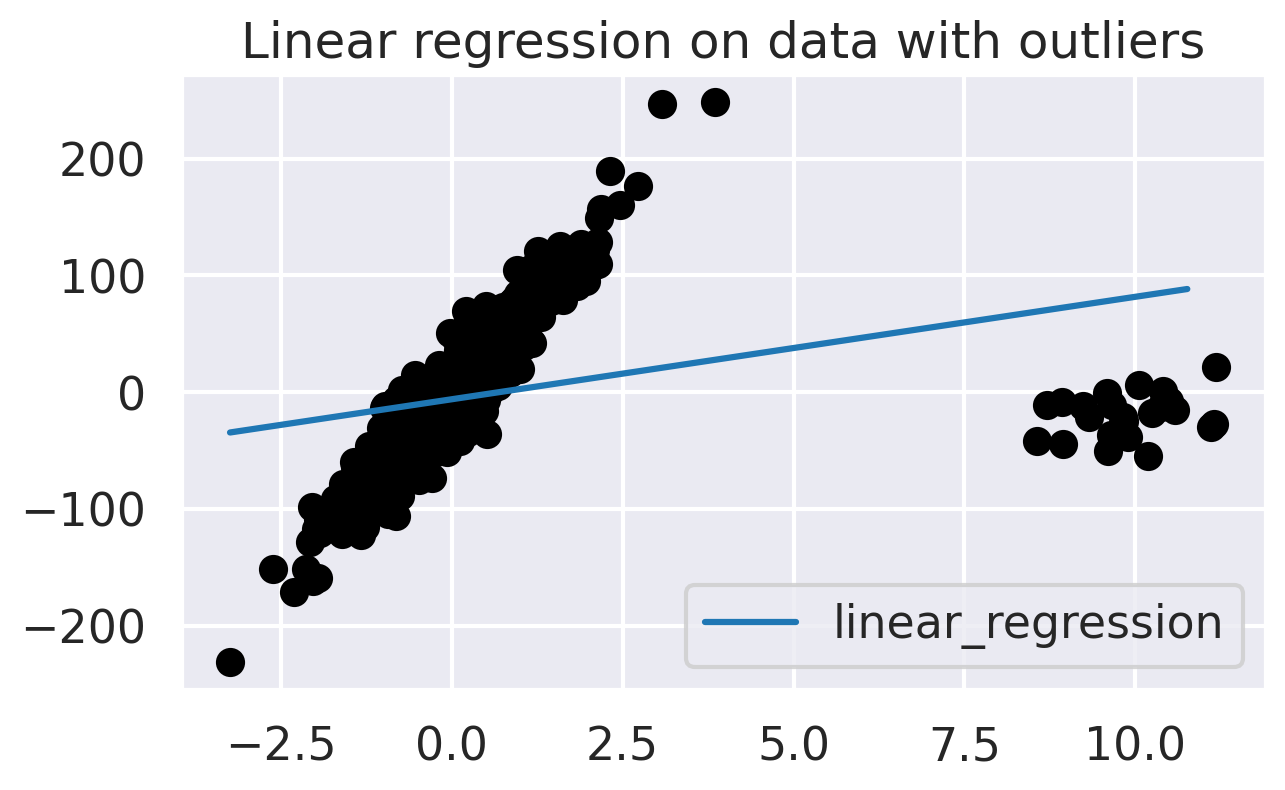

In [267]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Linear regression on data with outliers");

#### Huber Regression
--->  algoritmo de regressão que atribui menos peso a observações identificadas como outliers.

In [268]:
huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

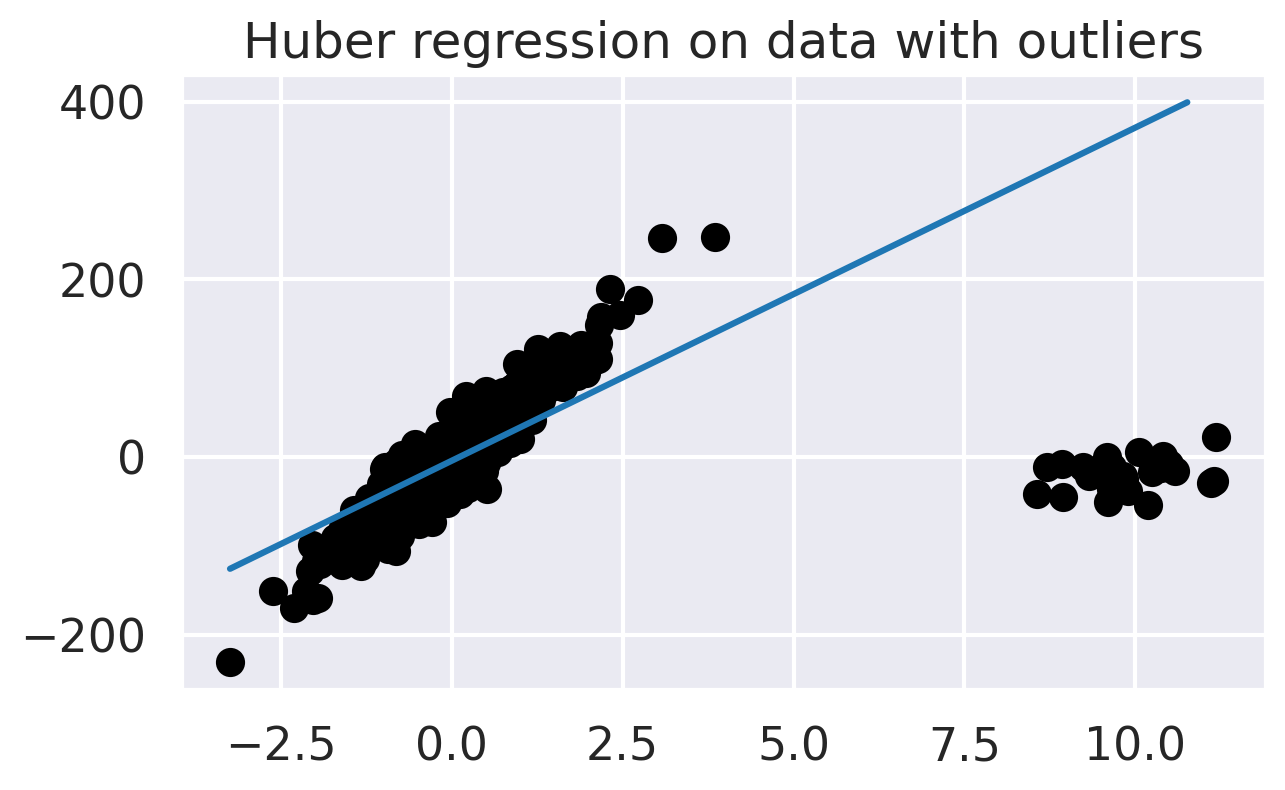

In [269]:
fix, ax = plt.subplots()
fit_df["huber_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Huber regression on data with outliers");

#### RANSAC Regression
 ---> estima o modelo final usando apenas os inliers

In [270]:
ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

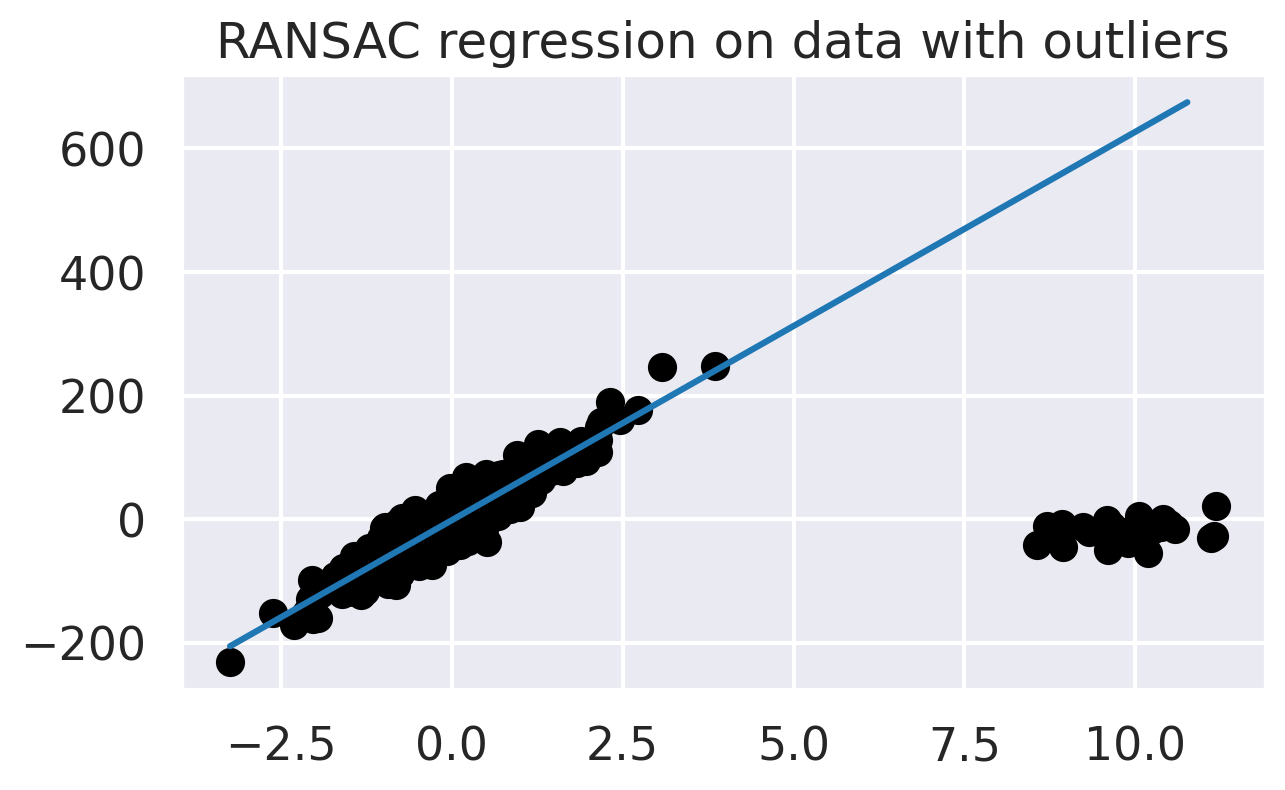

In [271]:
fix, ax = plt.subplots()
fit_df["ransac_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("RANSAC regression on data with outliers");

In [272]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers we have added ourselves: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

Total outliers: 51
Outliers we have added ourselves: 25 / 25


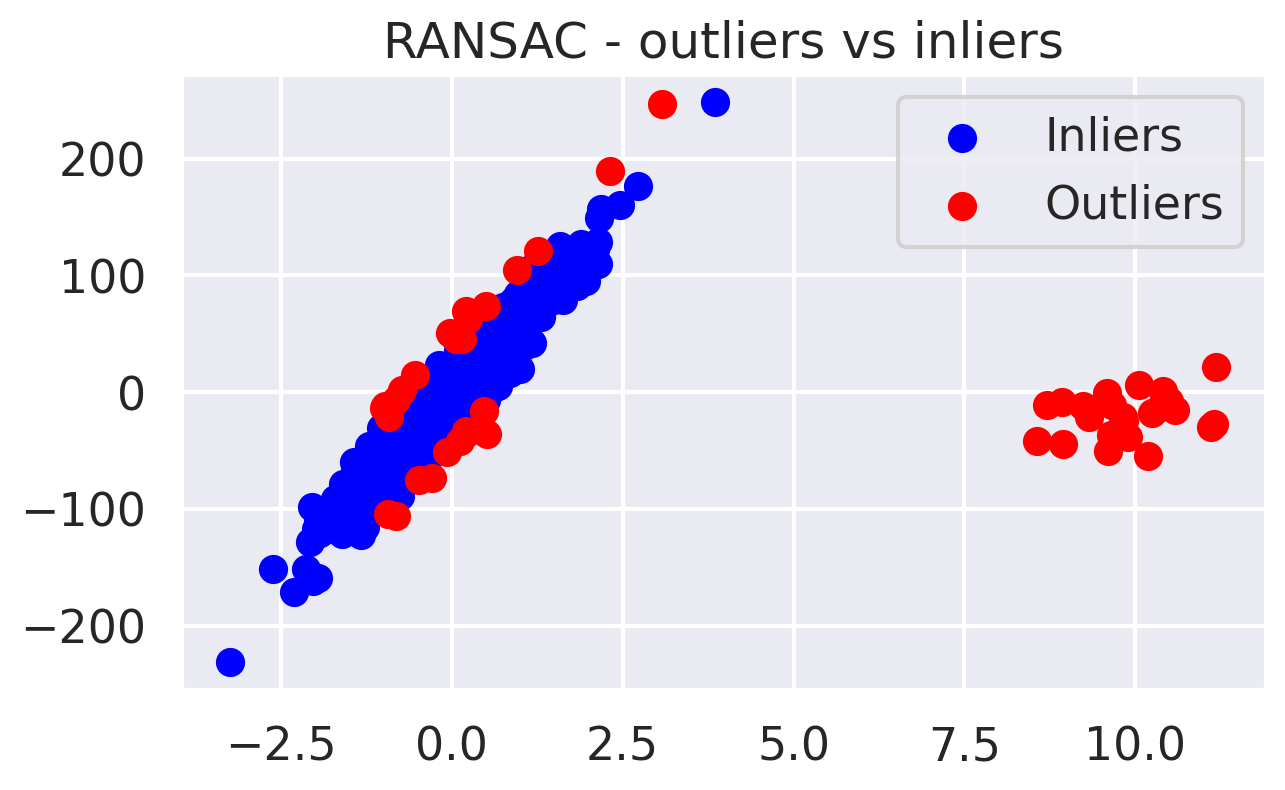

In [273]:
plt.scatter(X[inlier_mask], y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", label="Outliers")
plt.legend()
plt.title("RANSAC - outliers vs inliers");

#### Theil-Sen
 --  É um método de regressão não paramétrico, o que significa que não faz nenhuma suposição sobre a distribuição de dados subjacente. 

 Em resumo, envolve ajustar vários modelos de regressão em subconjuntos dos dados de treinamento e, em seguida, agregar os coeficientes na última etapa.

In [274]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

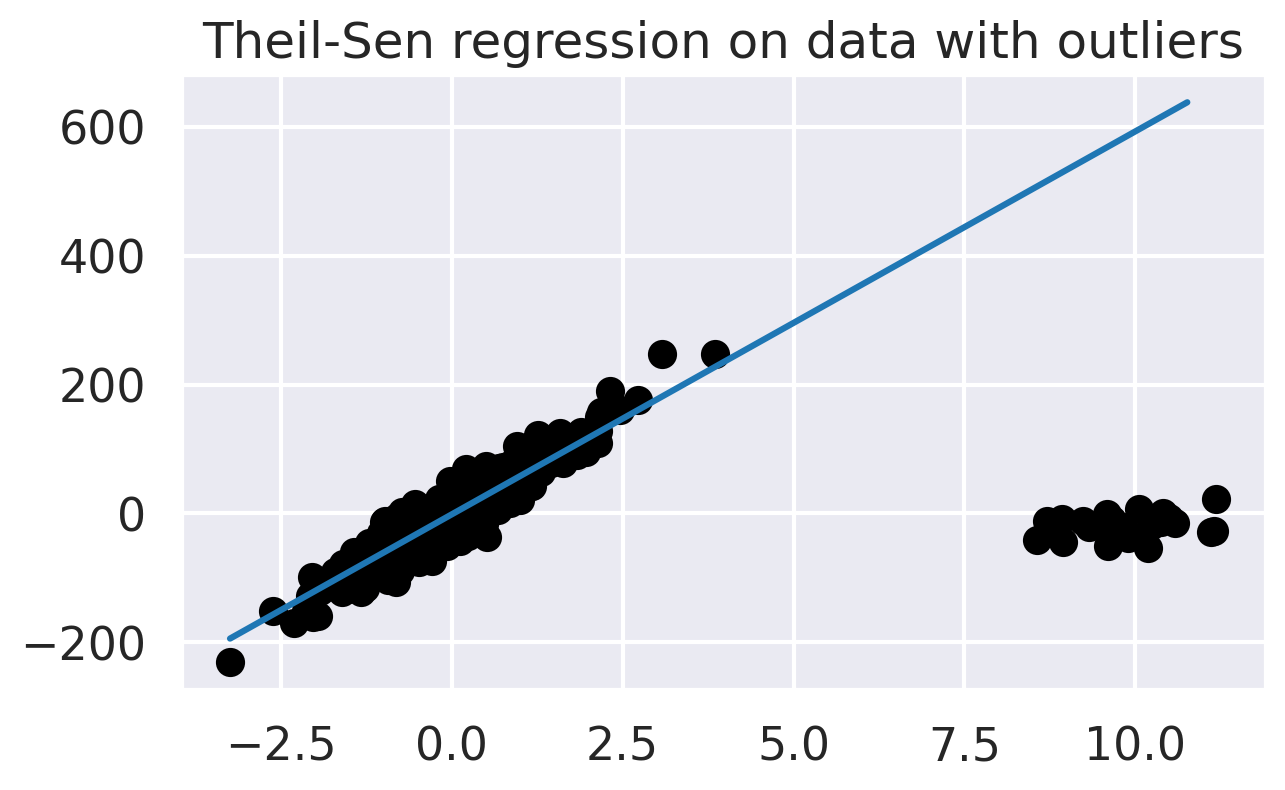

In [275]:
fix, ax = plt.subplots()
fit_df["theilsen_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Theil-Sen regression on data with outliers");

#### Comparação dos modelos

In [276]:
pd.DataFrame(coef_list, columns=["model", "coef"]).round(2)

,model,coef
0,original_coef,64.59
1,linear_regression,8.77
2,huber_regression,37.52
3,ransac_regression,62.85
4,theilsen_regression,59.49


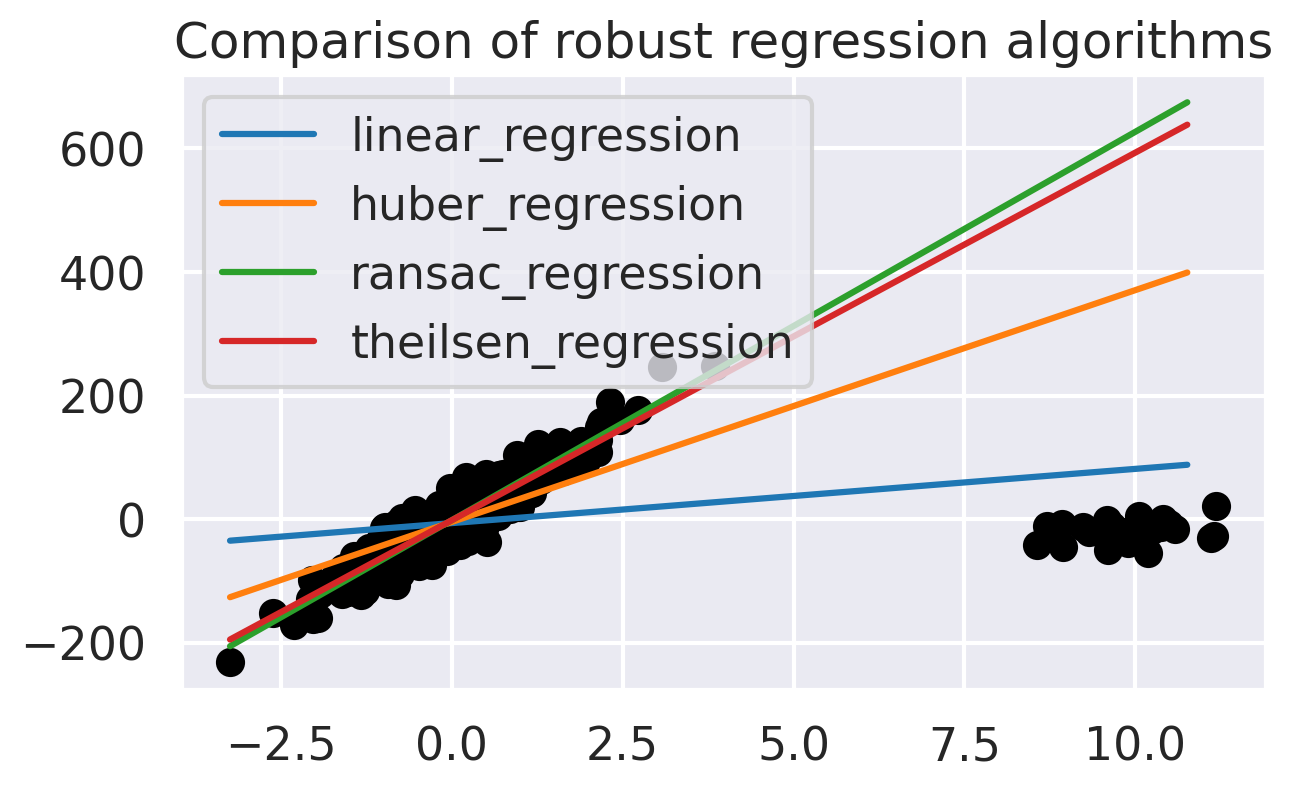

In [277]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Comparison of robust regression algorithms");

# Classificadores - Sklearn

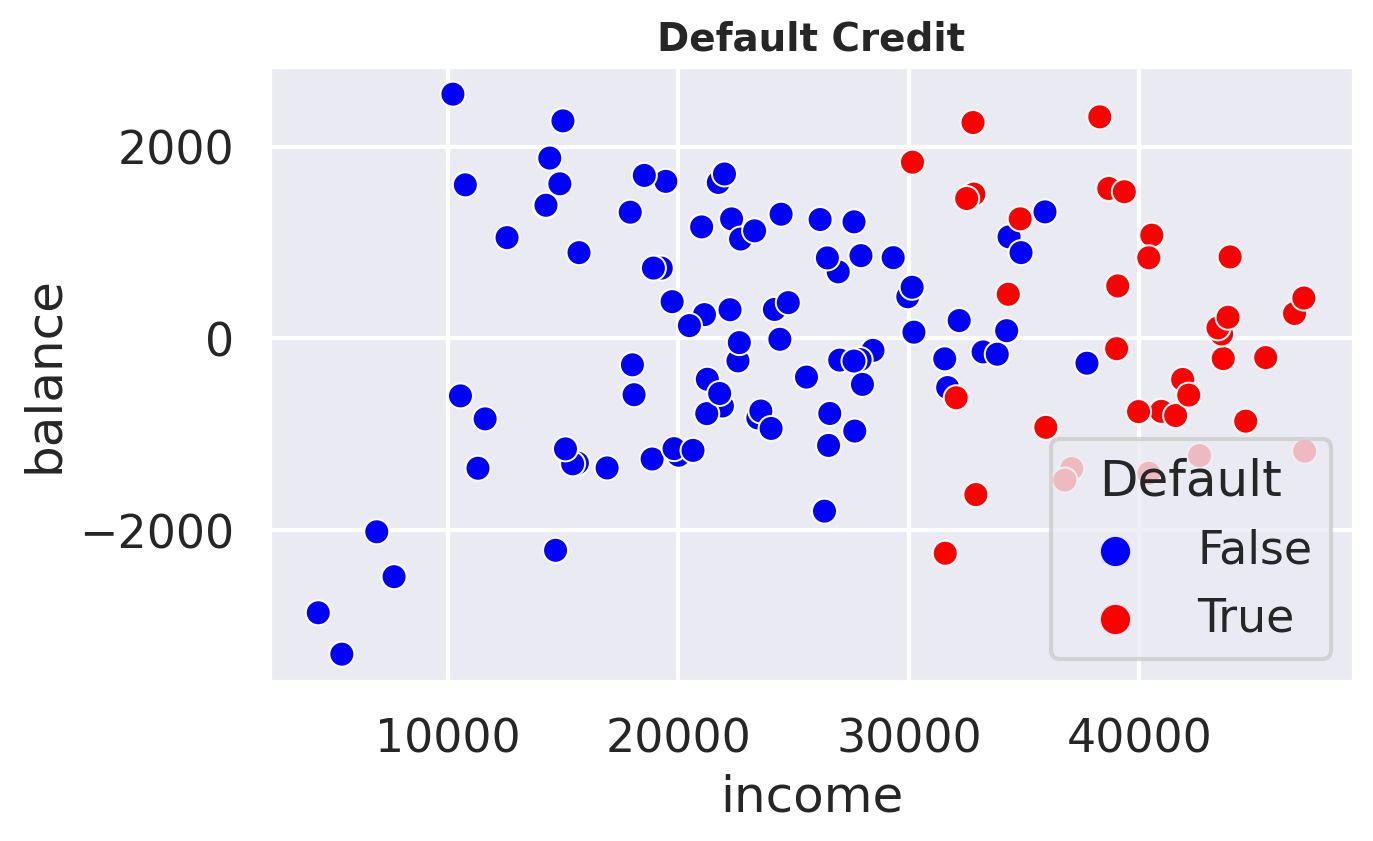

In [278]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_samples=120, class_sep=0.85, weights=[0.7,0.3],
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2
)

df = pd.DataFrame()
df['income'] = ( X[:,0] + 3 ) * 10000
df['balance'] = X[:,1] * 1000
df['default'] = y
df['default'] = df['default'].astype('bool')

sns.scatterplot(x='income',y='balance',hue='default',data=df,palette=['blue','red'])
plt.title('Default Credit', fontsize=14, weight='bold')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend(title='Default',loc='lower right')
plt.show()

plt.show()

In [279]:
# you can skip this code!

# Adaptado de Introduction to Machine Learning with Python by Andreas C. Müller, Sarah Guido
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

KNeighborsClassifier()
SVC()
DecisionTreeClassifier()


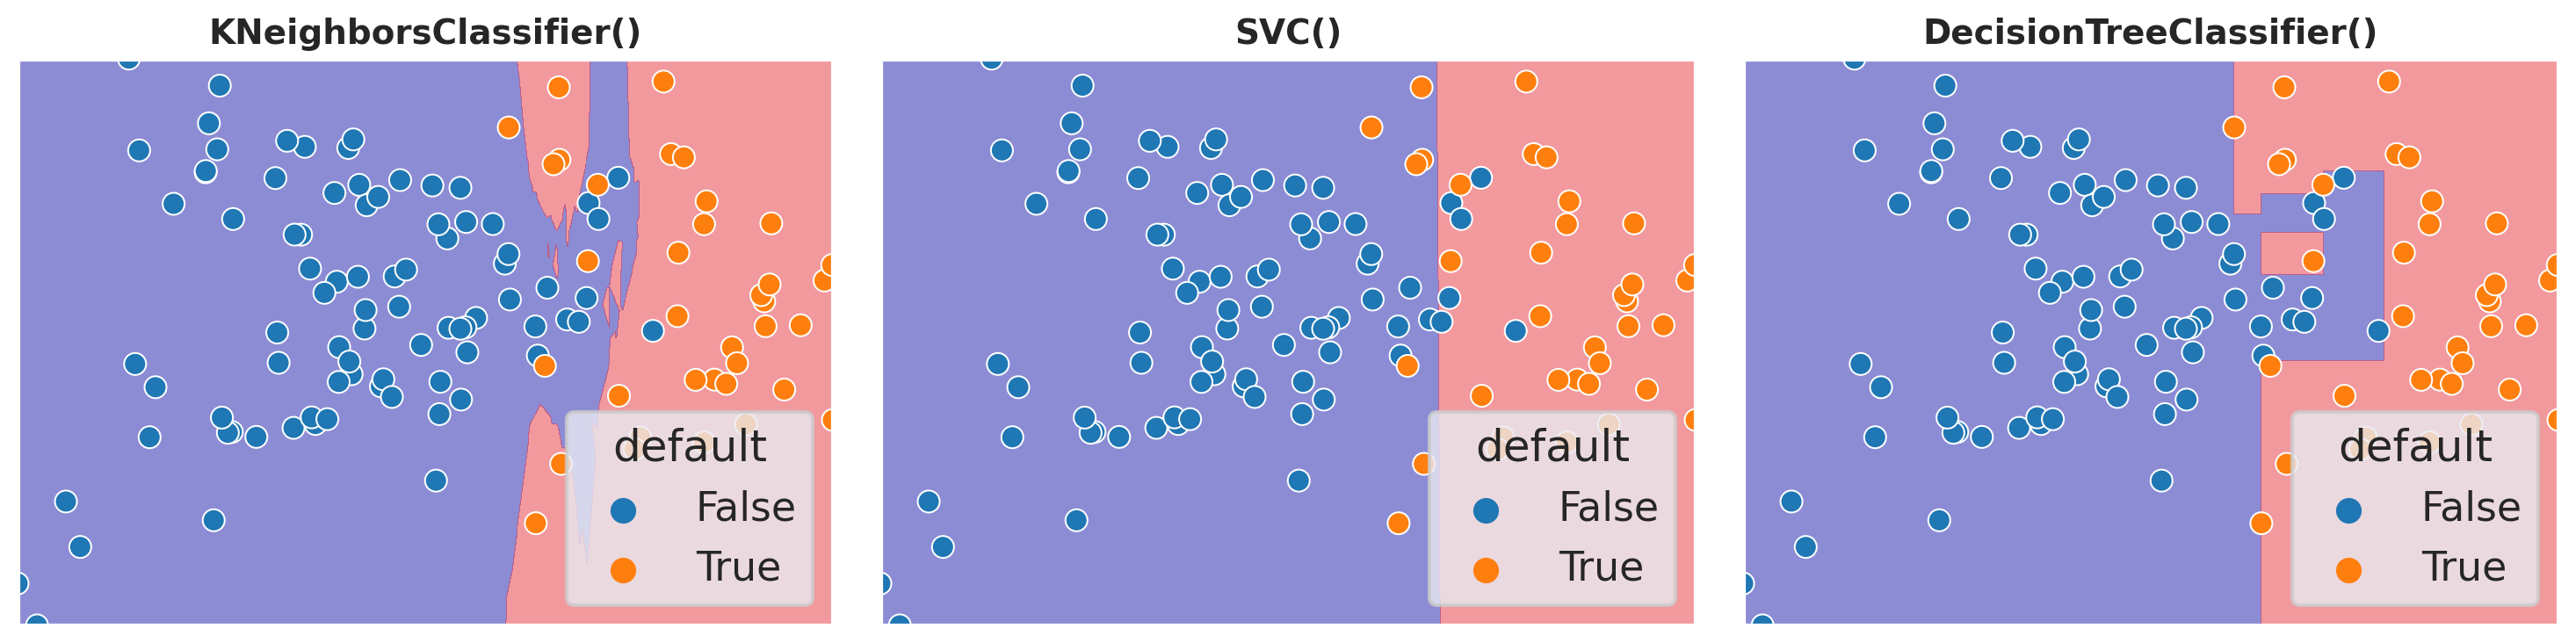

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = np.array(df[['income','balance']])
y = df['default']

models = [KNeighborsClassifier(n_neighbors=5),
          SVC(),
          DecisionTreeClassifier()]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for model, ax in zip(models, axes):
    print(model)
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, ax=ax)
    ax.set_title(model, fontsize=14, weight='bold')
    ax.set_xlabel('income')
    ax.set_ylabel('balance')

plt.tight_layout()
plt.show()


### Regressão Logistica

In [294]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [297]:
from sklearn.linear_model import LogisticRegression
X = df[['x1','x2']]
y = df.y


In [299]:
# Definimos a Classe de Modelos com seus Parâmetros

clf = LogisticRegression(max_iter=1000)
print(clf)
clf.fit(X,y)

print( clf.coef_, clf.intercept_)

LogisticRegression(max_iter=1000)
[[ 1.21523438 -2.60803724]] [0.12484869]


#### Predição

In [300]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])


Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é útil quando se deseja refinar os resultados ou ainda desejamos empregar esses valores para solução de problemas multiclasse.

In [301]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [305]:
zip(clf.predict(X),clf.predict_proba(X))

In [302]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

#### Métricas

In [306]:
clf.score(X,y)

0.87

Esse score de $0.87$, corresponde à **Acuracidade do Modelo** sobre o nosso conjunto de treinamento `X`, isto é, o percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto. Você pode obter o mesmo valor apenas contando o número de acertos da predição sobre o total de casos.




In [307]:
sum( clf.predict(X) == y ) / len(X)

0.87

In [308]:
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df


,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


In [310]:
from matplotlib.lines import Line2D


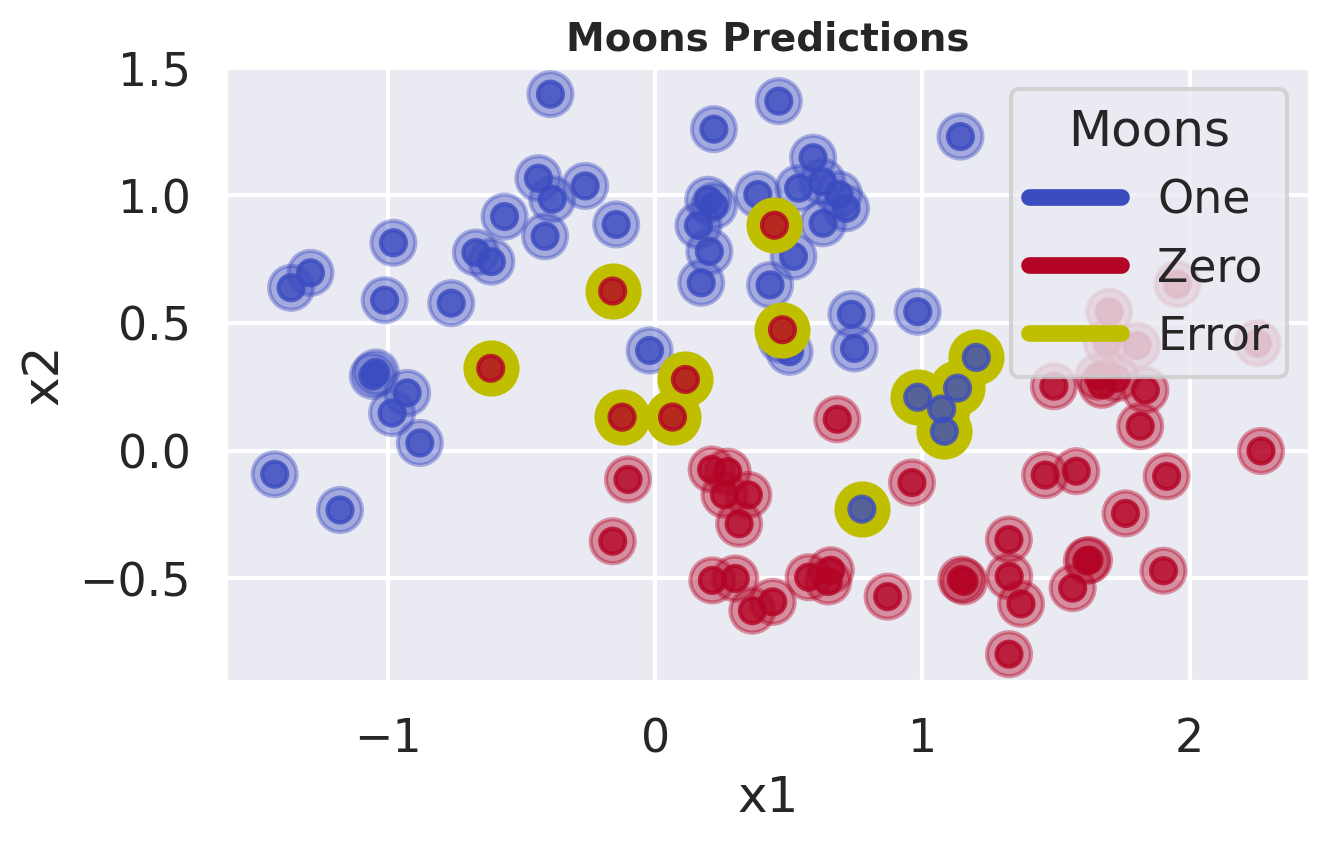

In [311]:
cmap_data = plt.cm.coolwarm

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



/home/anamarcacini/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


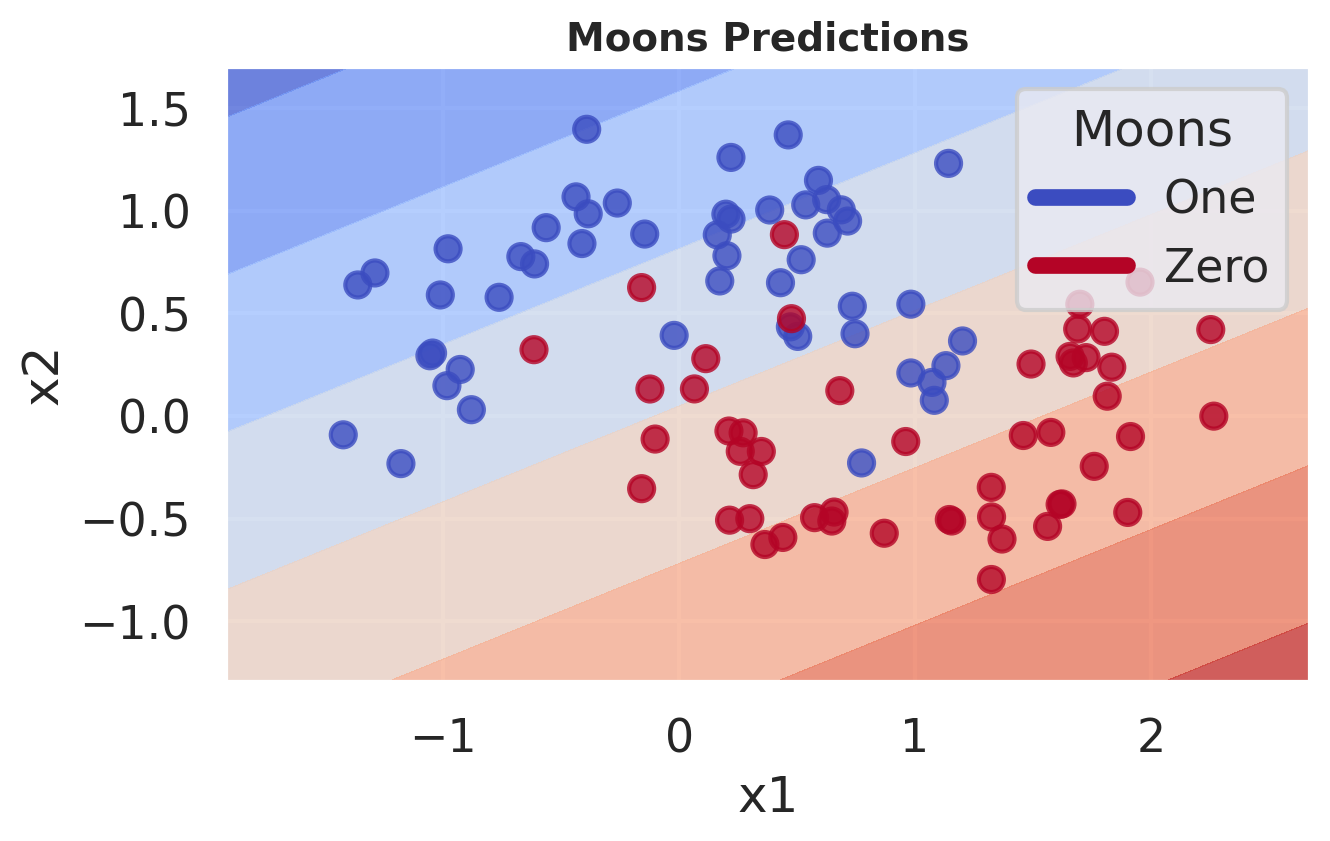

In [312]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

In [313]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']] # vamos empregar apenas uma parte dos dados
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [314]:
from sklearn.linear_model import LogisticRegression

# Entradas e Saídas
X = df[['radius_mean', 'texture_mean', 'perimeter_mean']]
y = df['diagnosis']

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))



0.9086115992970123


In [315]:
# Predição
X_new = pd.DataFrame({'radius_mean': [15.1], 'texture_mean': [15.8], 'perimeter_mean': [90]  })
y_pred_case = clf.predict(X_new)

print(5*'\n' + 'x = ' , X_new, '\npredição = ', y_pred_case)






x =     radius_mean  texture_mean  perimeter_mean
0         15.1          15.8              90 
predição =  ['B']


In [316]:
print(y_pred[0:10],'...')

['M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M'] ...


In [317]:
df['y_pred'] = y_pred
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,y_pred
0,M,17.99,10.38,122.80,M
1,M,20.57,17.77,132.90,M
2,M,19.69,21.25,130.00,M
3,M,11.42,20.38,77.58,B
4,M,20.29,14.34,135.10,M


In [318]:
print(clf.coef_, clf.intercept_)

[[-3.2954799   0.22087804  0.65043105]] [-18.17021723]


In [319]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print('\nScore de Acuracidade (modo 1):\n')
print(accuracy)

accuracy = clf.score(X, y)
print('\nScore de Acuracidade (modo 2):\n')
print(accuracy)


Score de Acuracidade (modo 1):

0.9086115992970123

Score de Acuracidade (modo 2):

0.9086115992970123


# DICIONÁRIO


Verifique que os mesmos resultados podem ser obtidos normalizando apenas as variáveis preditoras.

preditoras - > apenas os parametros da regressão linear e não o valor de y

MAPE --> percentual

MSE ---> cuidado com numeros grandes e pequenos
(min square error --> skitlearn minimiza essa variavel)
